Il doit comprendre une introduction, une description
succincte des algorithmes utilisés, une interprétation des résultats, une conclusion, etc.

In [89]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)


# INTRODUCTION

Analyse exploratoire des données
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
1. Commencez par une analyse descriptive unidimensionnelle des données. Voyez-vous des anomalies?
2. Des transformations des variables quantitatives vous semblent-t-elles pertinentes ? Certaines variables
qualitatives ont de nombreuses modalités, il peut être pertinent de regrouper certaines modalités entre
elles.
3. Les distributions sont-elles comparables entre le jeu d’apprentissage et le jeu de test ?
4. Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation :
par exemple scatterplot, correlation plot ... Analysez les dépendances entre les variables.
5. Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats.
6. Visualisez la possible dépendance entre les variables qualitatives et la variable à prédire.

In [107]:
# Lecture des données
data <- read.table("biodeg.csv", header = FALSE, sep=';')

name_keep_index = 1+c(0, 1, 7, 11, 12, 13, 14, 15, 16, 17, 21, 23, 24, 26, 27, 29,30, 35, 36, 38)

biodeg = as.data.frame(data[, 42])
colnames(biodeg) = c('Response')

biodeg[, "Response"] <- as.factor(biodeg[, "Response"]) #2: RB, 1: NRB

data <- data[, name_keep_index]
colnames(data) <- list('SpMax_L', 'J_Dz(e)', 'C%', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'SpPosA_B(p)', 'B01[C-Br]', 'B03[C-Cl]',
       'SpMax_A', 'Psi_i_1d', 'SdO', 'TI2_L', 'SpMax_B(m)', 'Psi_i_A',
       'SM6_B(m)')

# Premières lignes du jeu de données
head(data)

head(biodeg)


,SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,SpPosA_B(p),B01[C-Br],B03[C-Cl],SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,1.201,0,0,1.932,0.011,0.000,4.489,2.949,1.591,7.253
2,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,1.104,0,0,2.214,-0.204,0.000,1.542,3.315,1.967,7.257
3,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,1.092,0,0,1.942,-0.008,0.000,4.891,3.076,2.417,7.601
4,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,1.024,0,0,1.414,1.073,8.361,1.333,3.046,5.000,6.690
5,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,2,1.004,1.147,1.137,0,0,1.985,-0.002,10.348,5.588,3.351,2.405,8.003
6,4.236,3.4286,28.6,-0.275,3.313,2.522,9.383,1,1.014,1.149,1.119,0,0,1.980,-0.008,10.276,4.746,3.351,2.556,7.904


,Response
,<fct>
1,RB
2,RB
3,RB
4,RB
5,RB
6,RB


## Misssing data

In [108]:
print(paste("Number of missing values in dataset : ", sum(sapply(data, function(x) sum(is.na(x)))))) #0
print(paste("Number of missing values in dataset of response variable : ", sum(sapply(biodeg, function(x) sum(is.na(x)))))) #0                             

[1] "Number of missing values in dataset :  0"
[1] "Number of missing values in dataset of response variable :  0"


**Comment**: There is no missing values.

# Explanatory Data Analysis

## Unidimensional

In [173]:
quali_index <- 1+c(7, 11, 12)
quanti_index <- setdiff(1:20, quali_index)

quali_list <- colnames(data)[quali_index]
quanti_list <- colnames(data)[quanti_index]

### Response variables

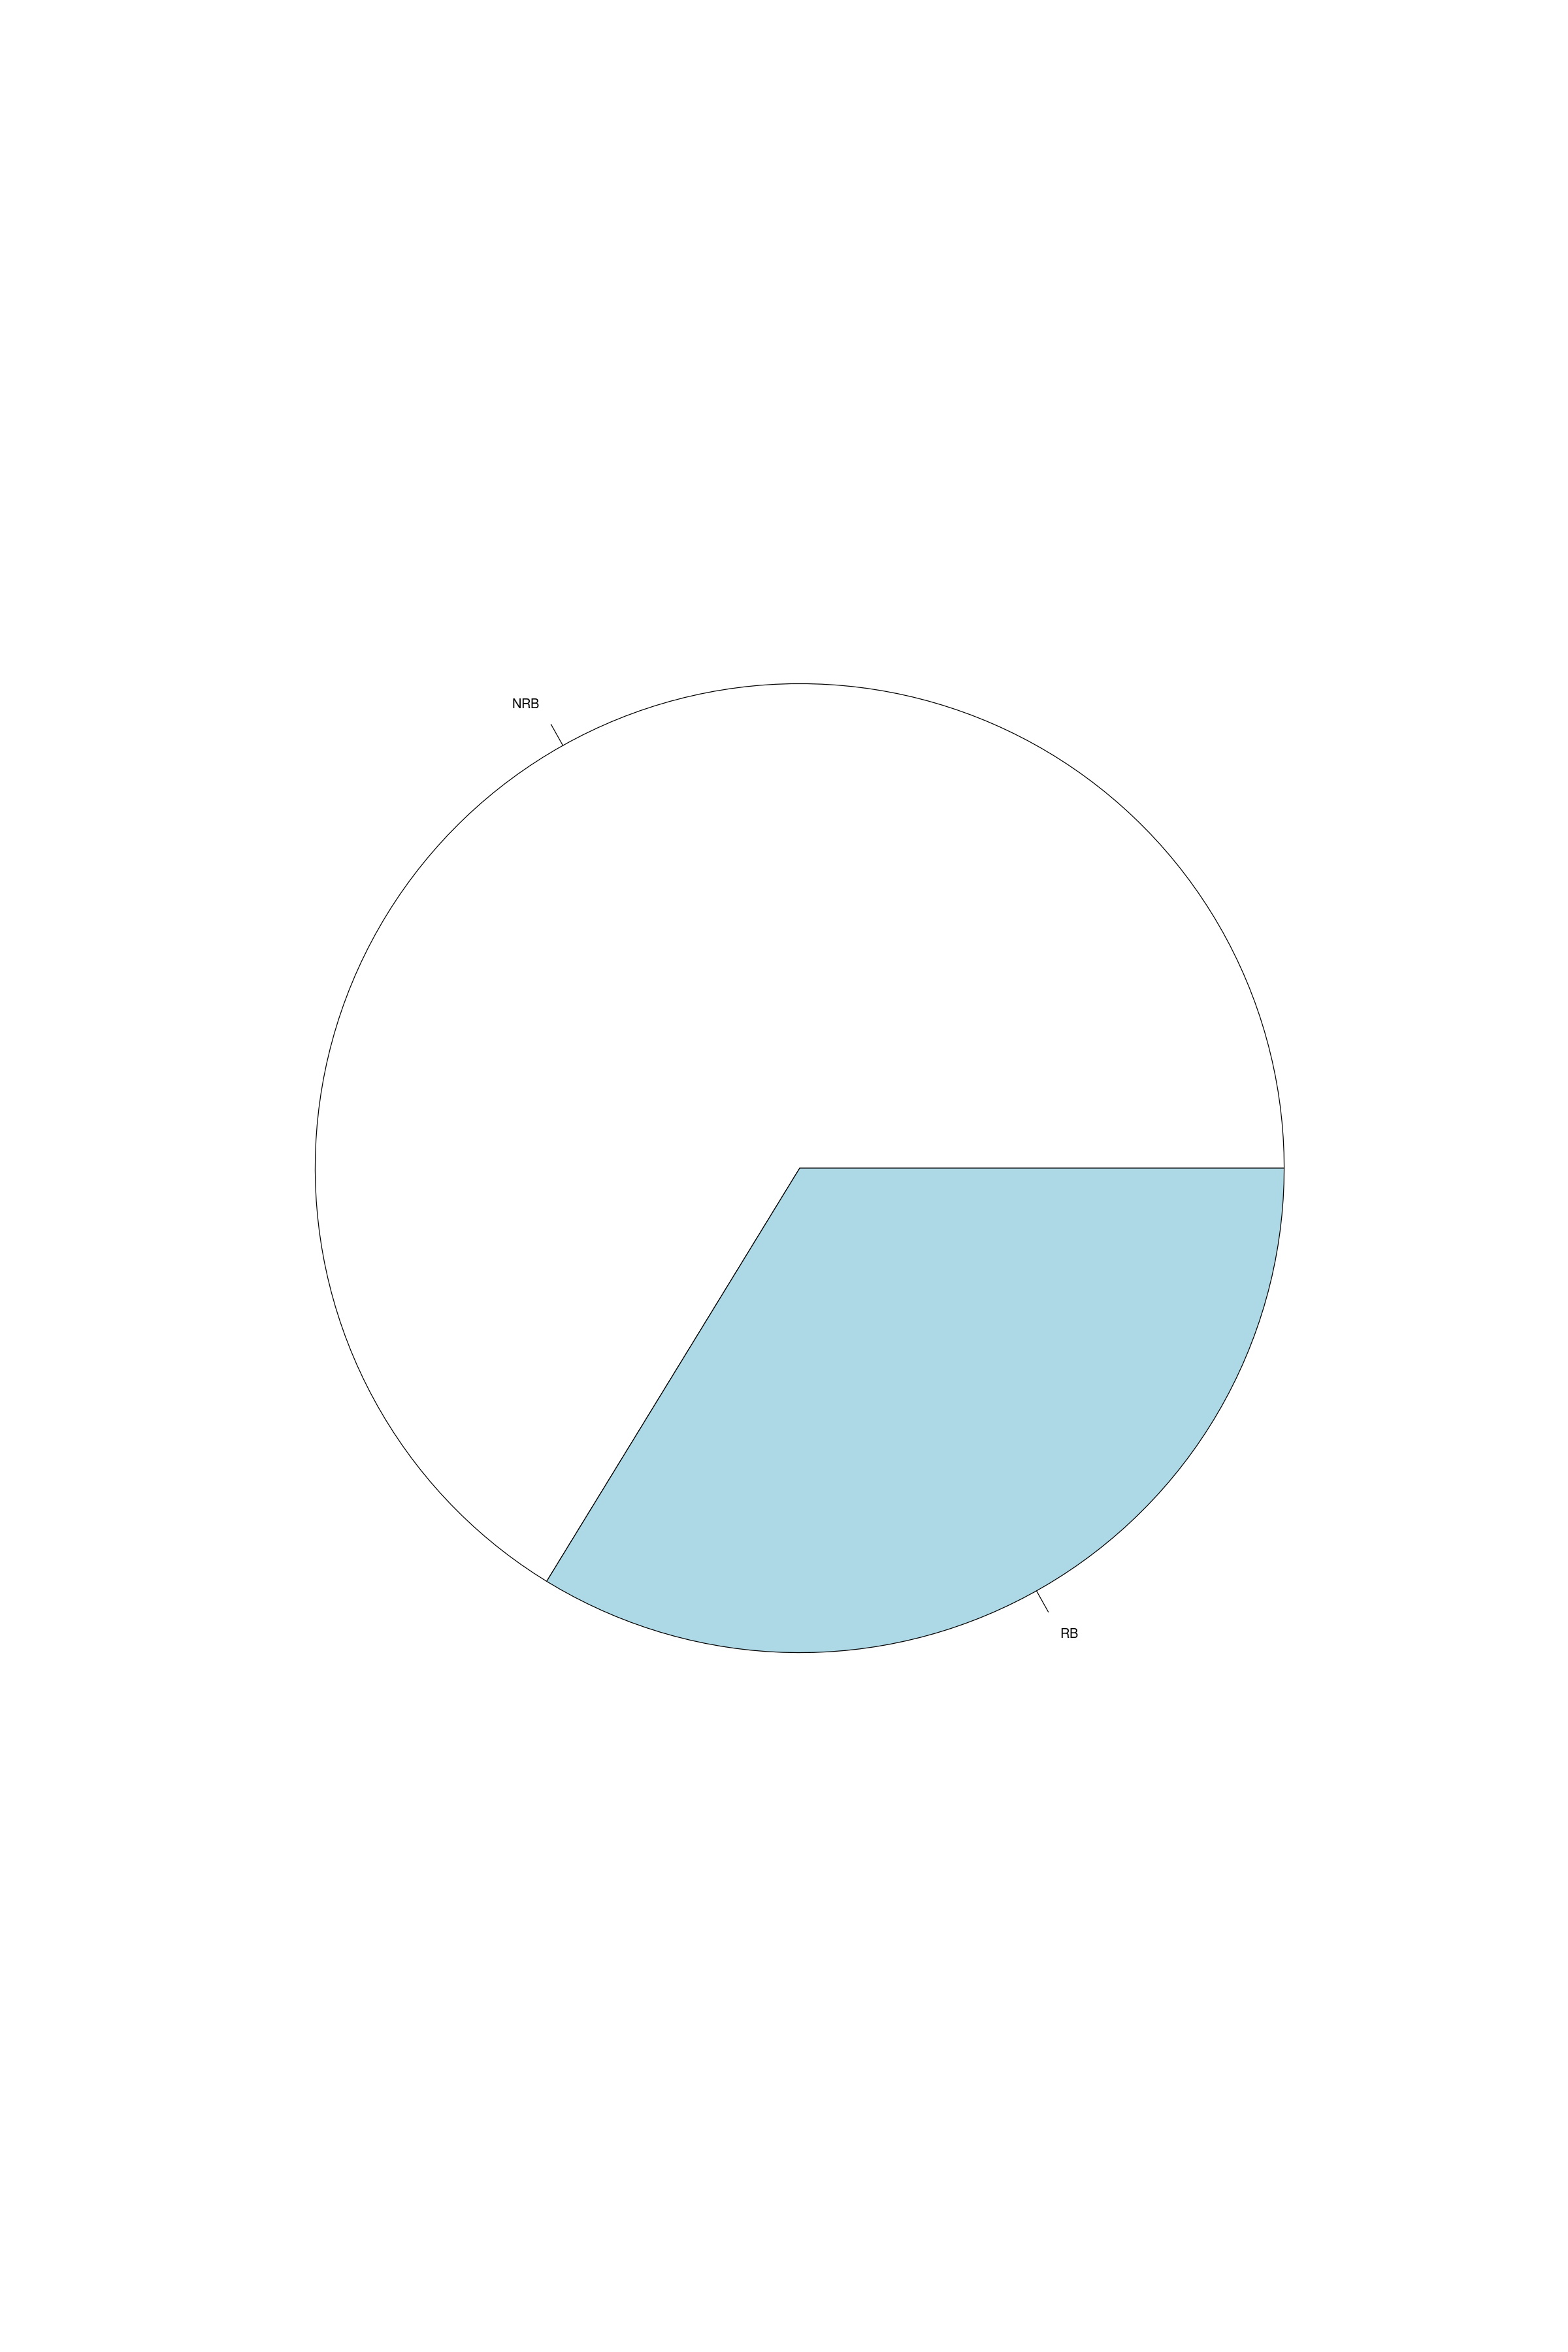

In [174]:
pie(table(biodeg[, 1]))

### Quantitative variables

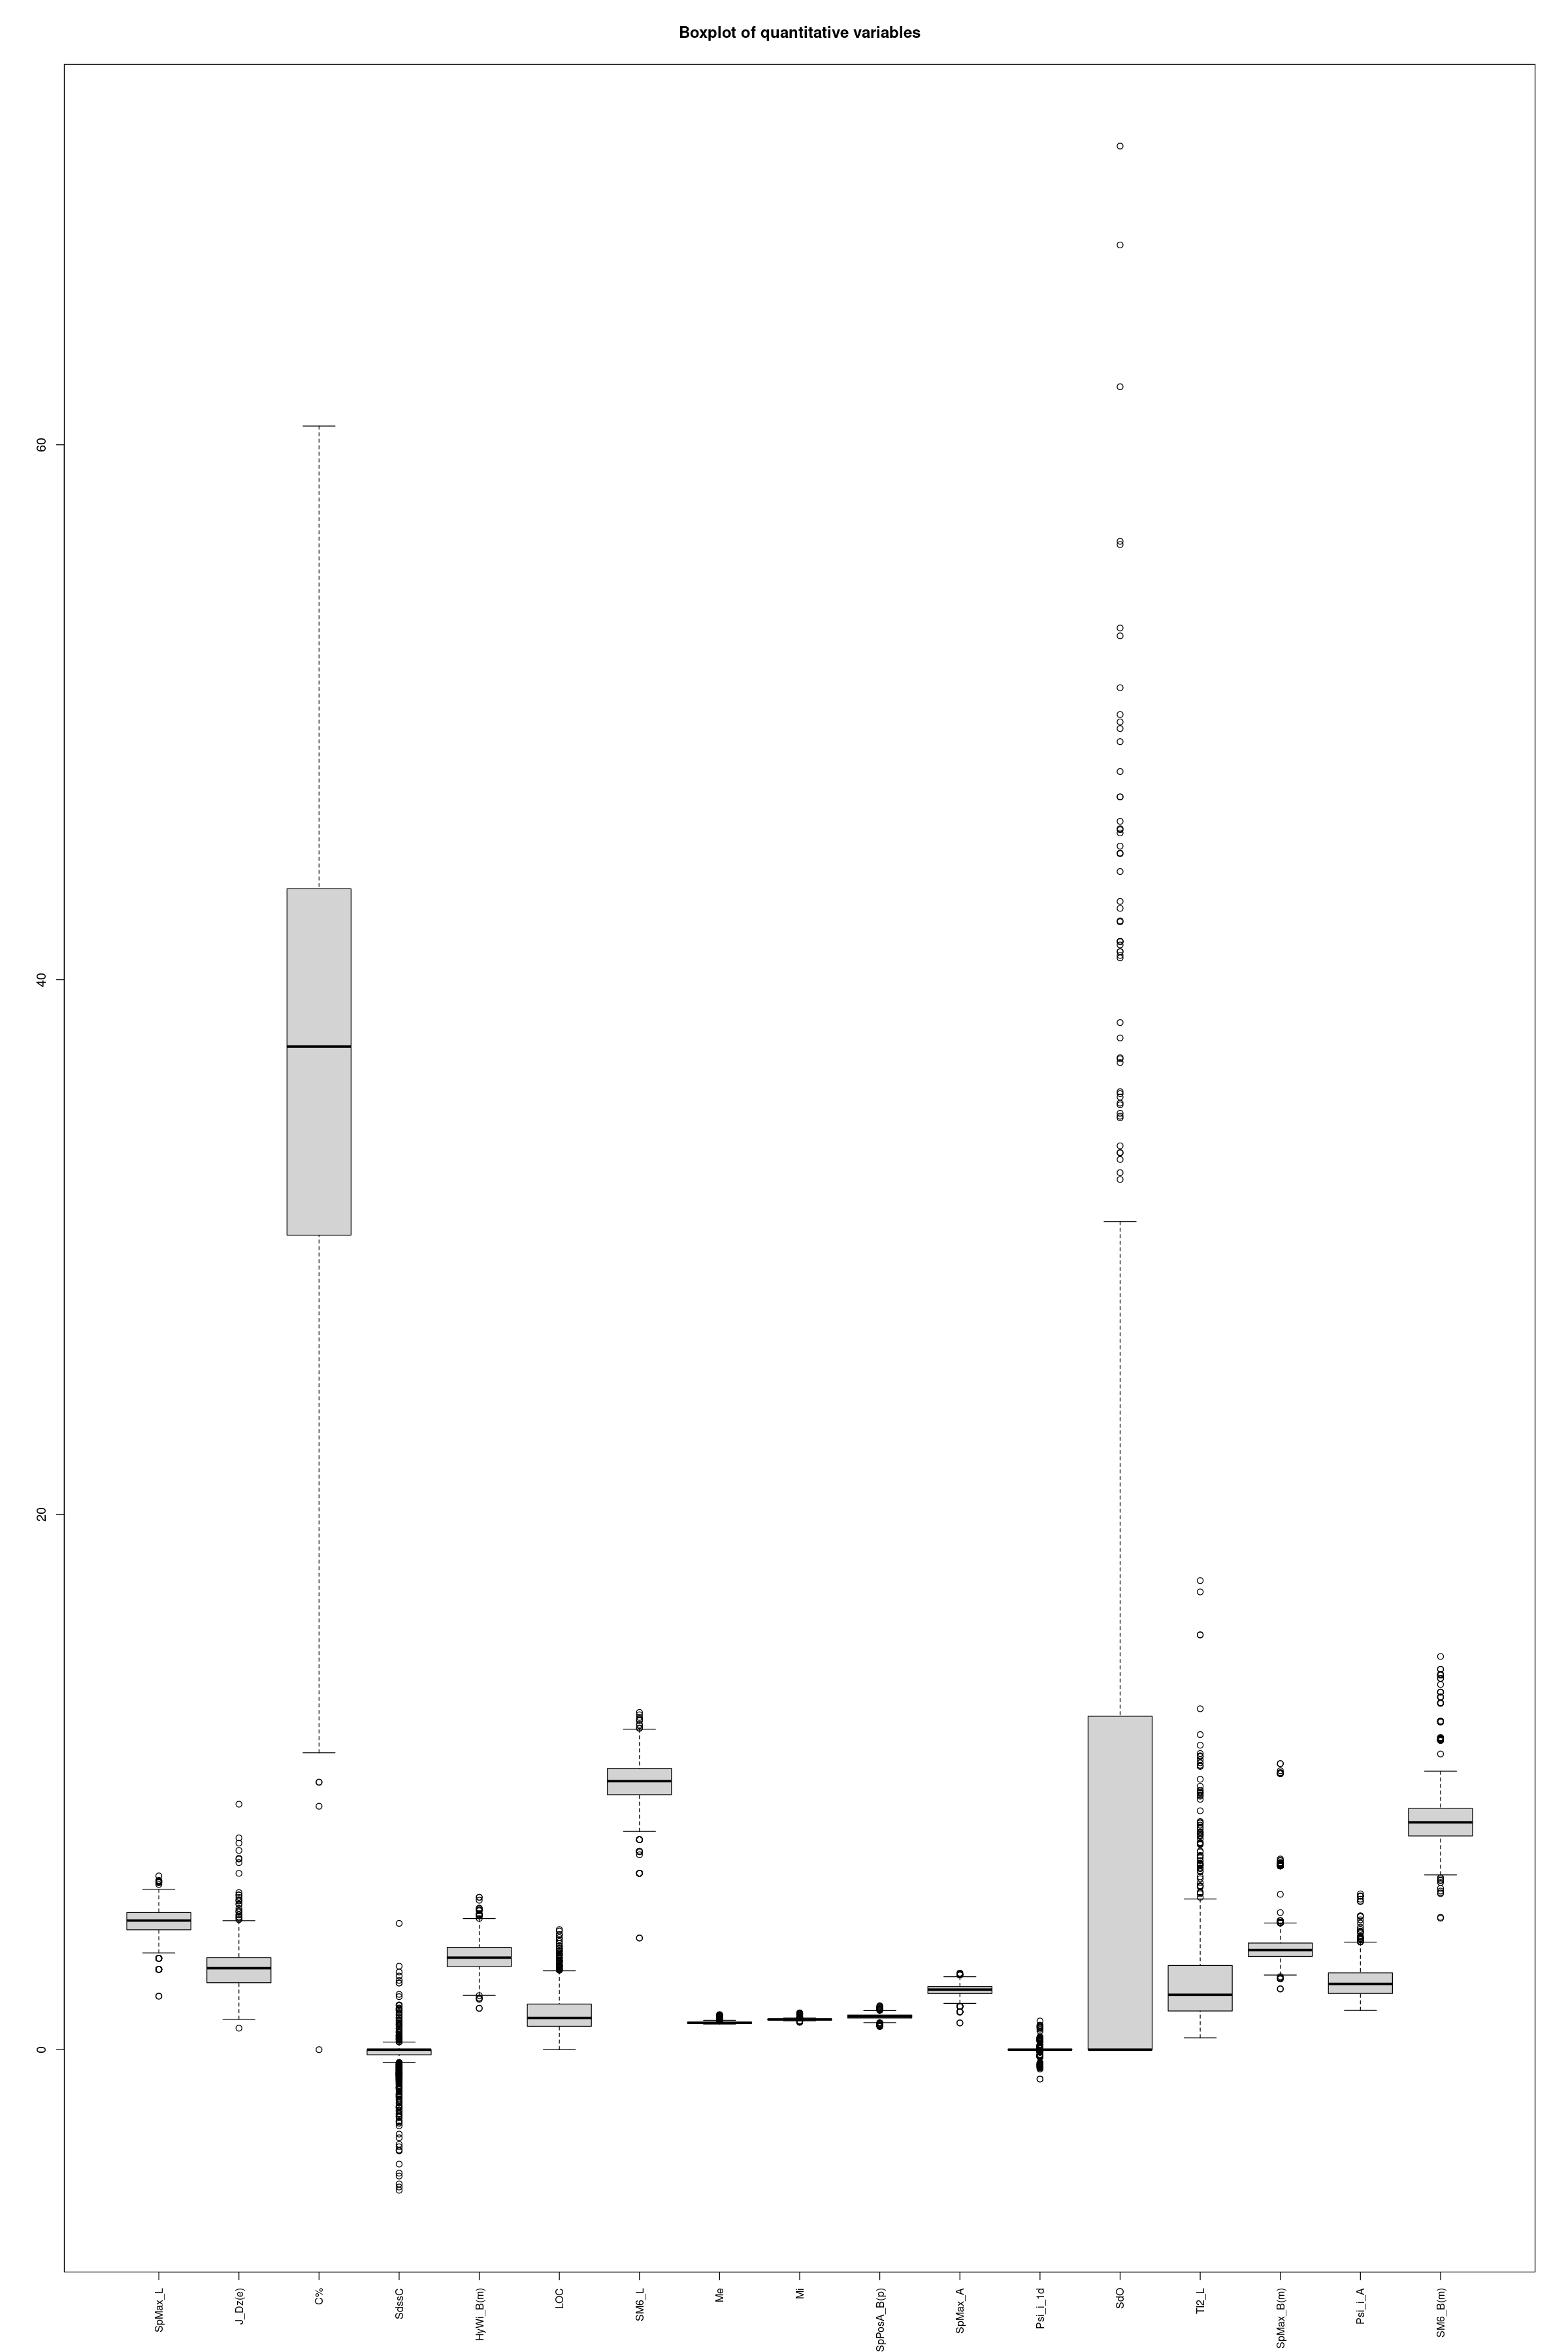

In [176]:
boxplot_data <- data[,quanti_index]

boxplot(boxplot_data, main = 'Boxplot of quantitative variables',
        names = quanti_list, xaxt = 'n')
axis(1, at = 1:length(quanti_list), labels = quanti_list, las = 2, cex.axis = 0.8)


**Comment**: There exists outliers and scale difference between the quantitative variables.

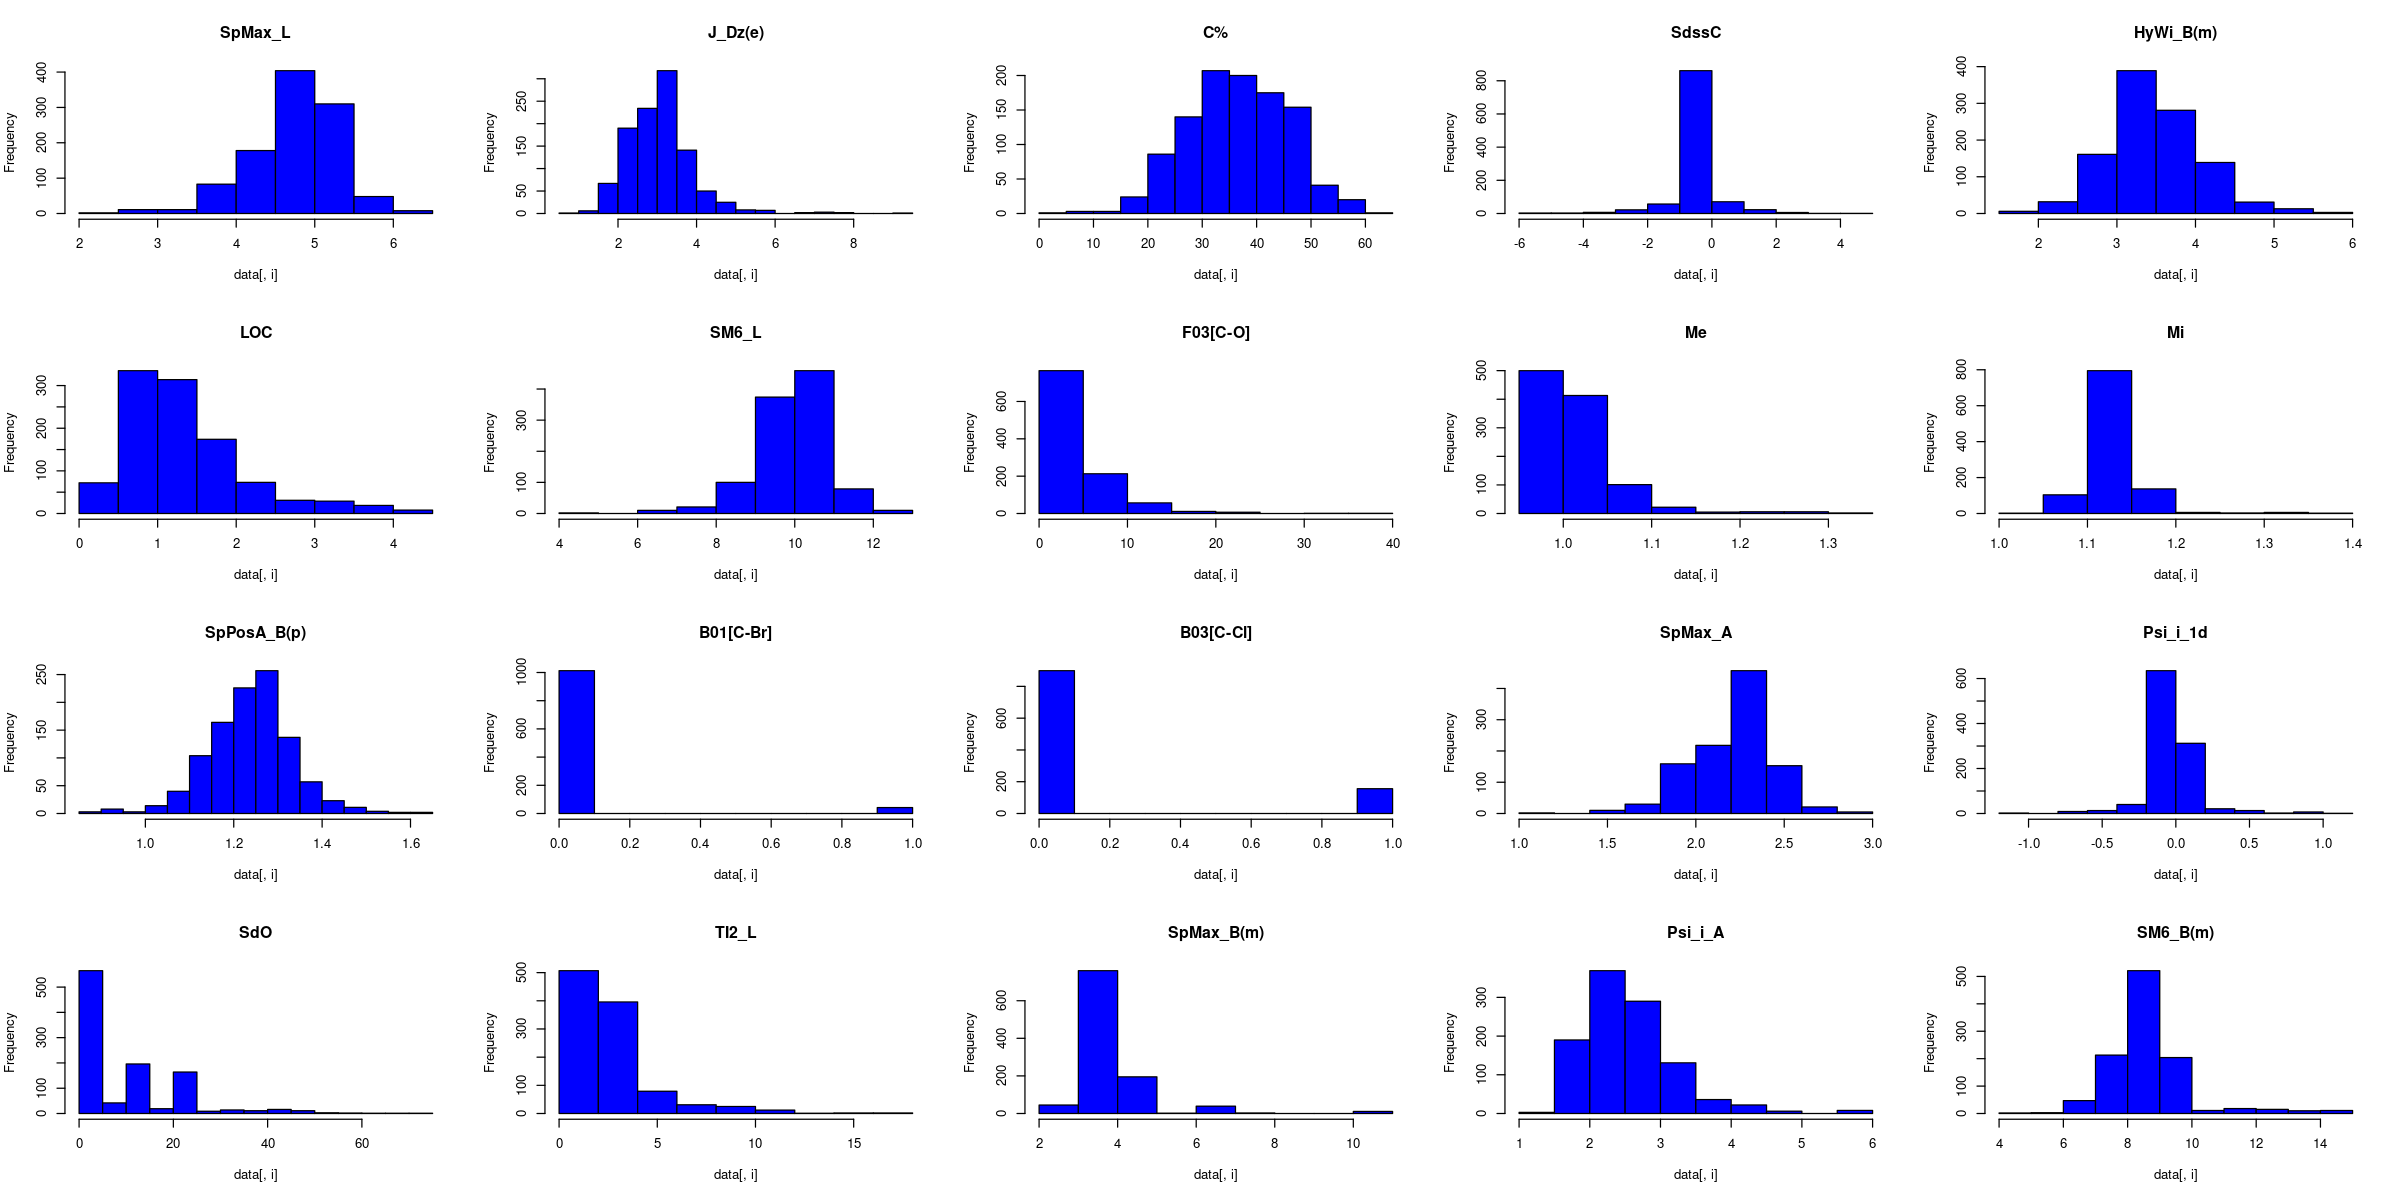

In [177]:
data_quali = data[, quali_index]

par(mfrow = c(4, 5))
options(repr.plot.width = 20, repr.plot.height = 10)
for (i in 1:20) {
    hist(data[, i], col = "blue", main = colnames(data)[i])
}

In [178]:
library(dplyr)
library(magrittr)

data_transform <- data

# left skewed
data_transform$SM6_L <- log((max(data$SM6_L) + 1) - data$SM6_L)
data_transform$SpMax_A <- log((max(data$SpMax_A) + 1) - data$SpMax_A)
data_transform$SpMax_L <- log((max(data$SpMax_L) + 1) - data$SpMax_L)

# right skewed
data_transform$TI2_L <- log(data$TI2_L)
data_transform$'J_Dz(e)' <- log(data$'J_Dz(e)')
data_transform$Psi_i_A <- log(data$Psi_i_A)
data_transform$'SM6_B(m)' <- log(data$'SM6_B(m)')
data_transform$LOC <- log10(data$LOC + 1)
data_transform$'SpMax_B(m)' <- log(data$'SpMax_B(m)')

data_transform$'HyWi_B(m)' <- sqrt(data$'HyWi_B(m)')


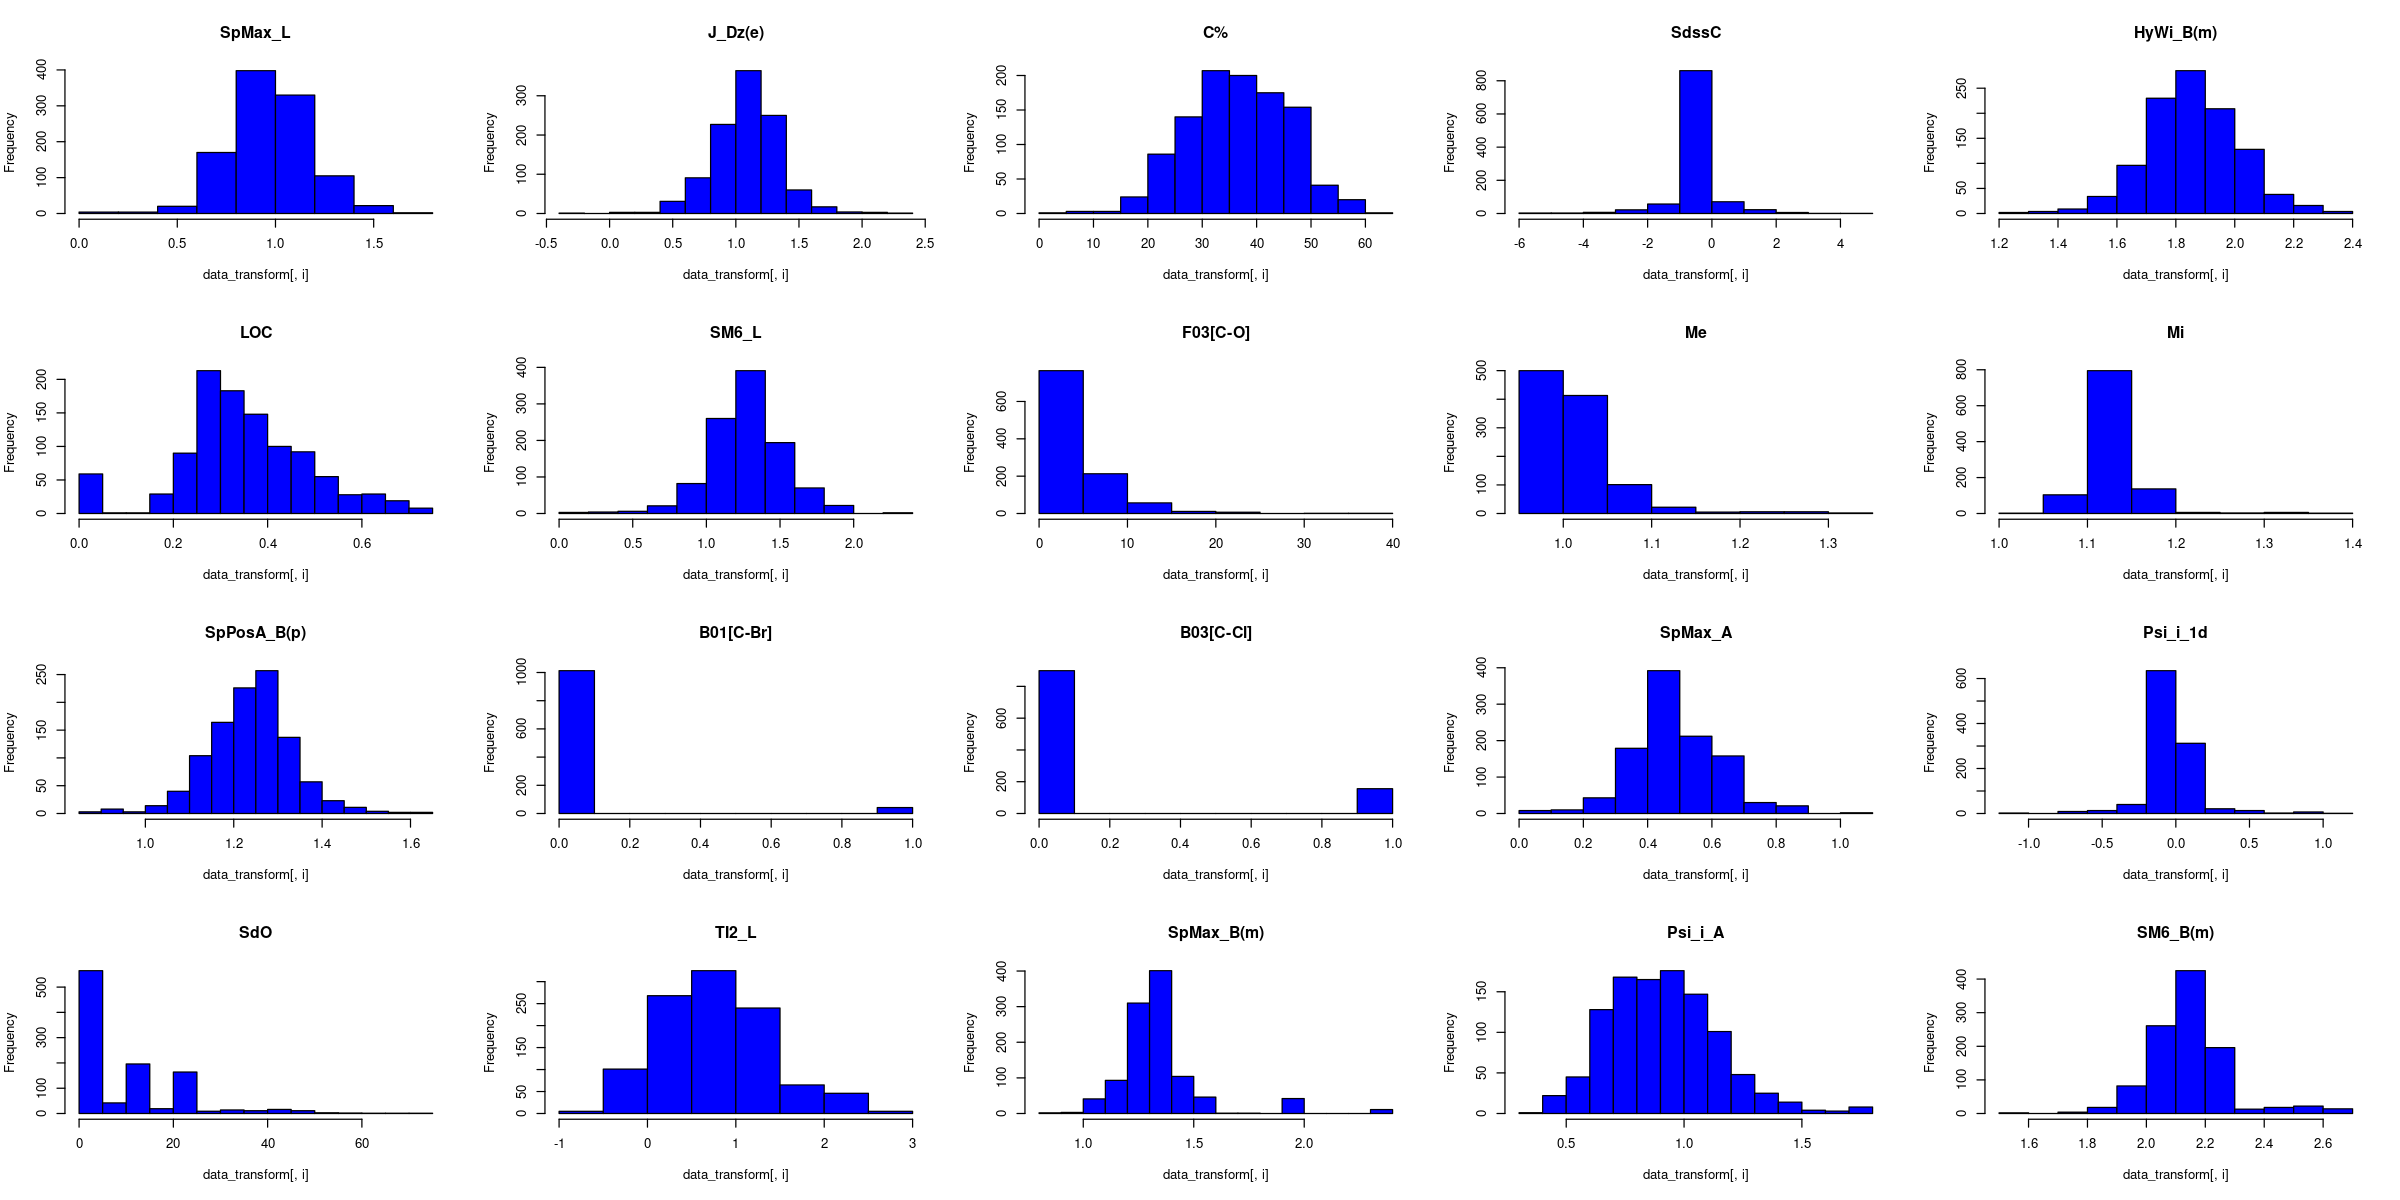

In [179]:
par(mfrow = c(4, 5))
options(repr.plot.width = 20, repr.plot.height = 10)
for (i in 1:20) {
    hist(data_transform[, i], col = "blue", main = colnames(data)[i])
}

### Categorical variables

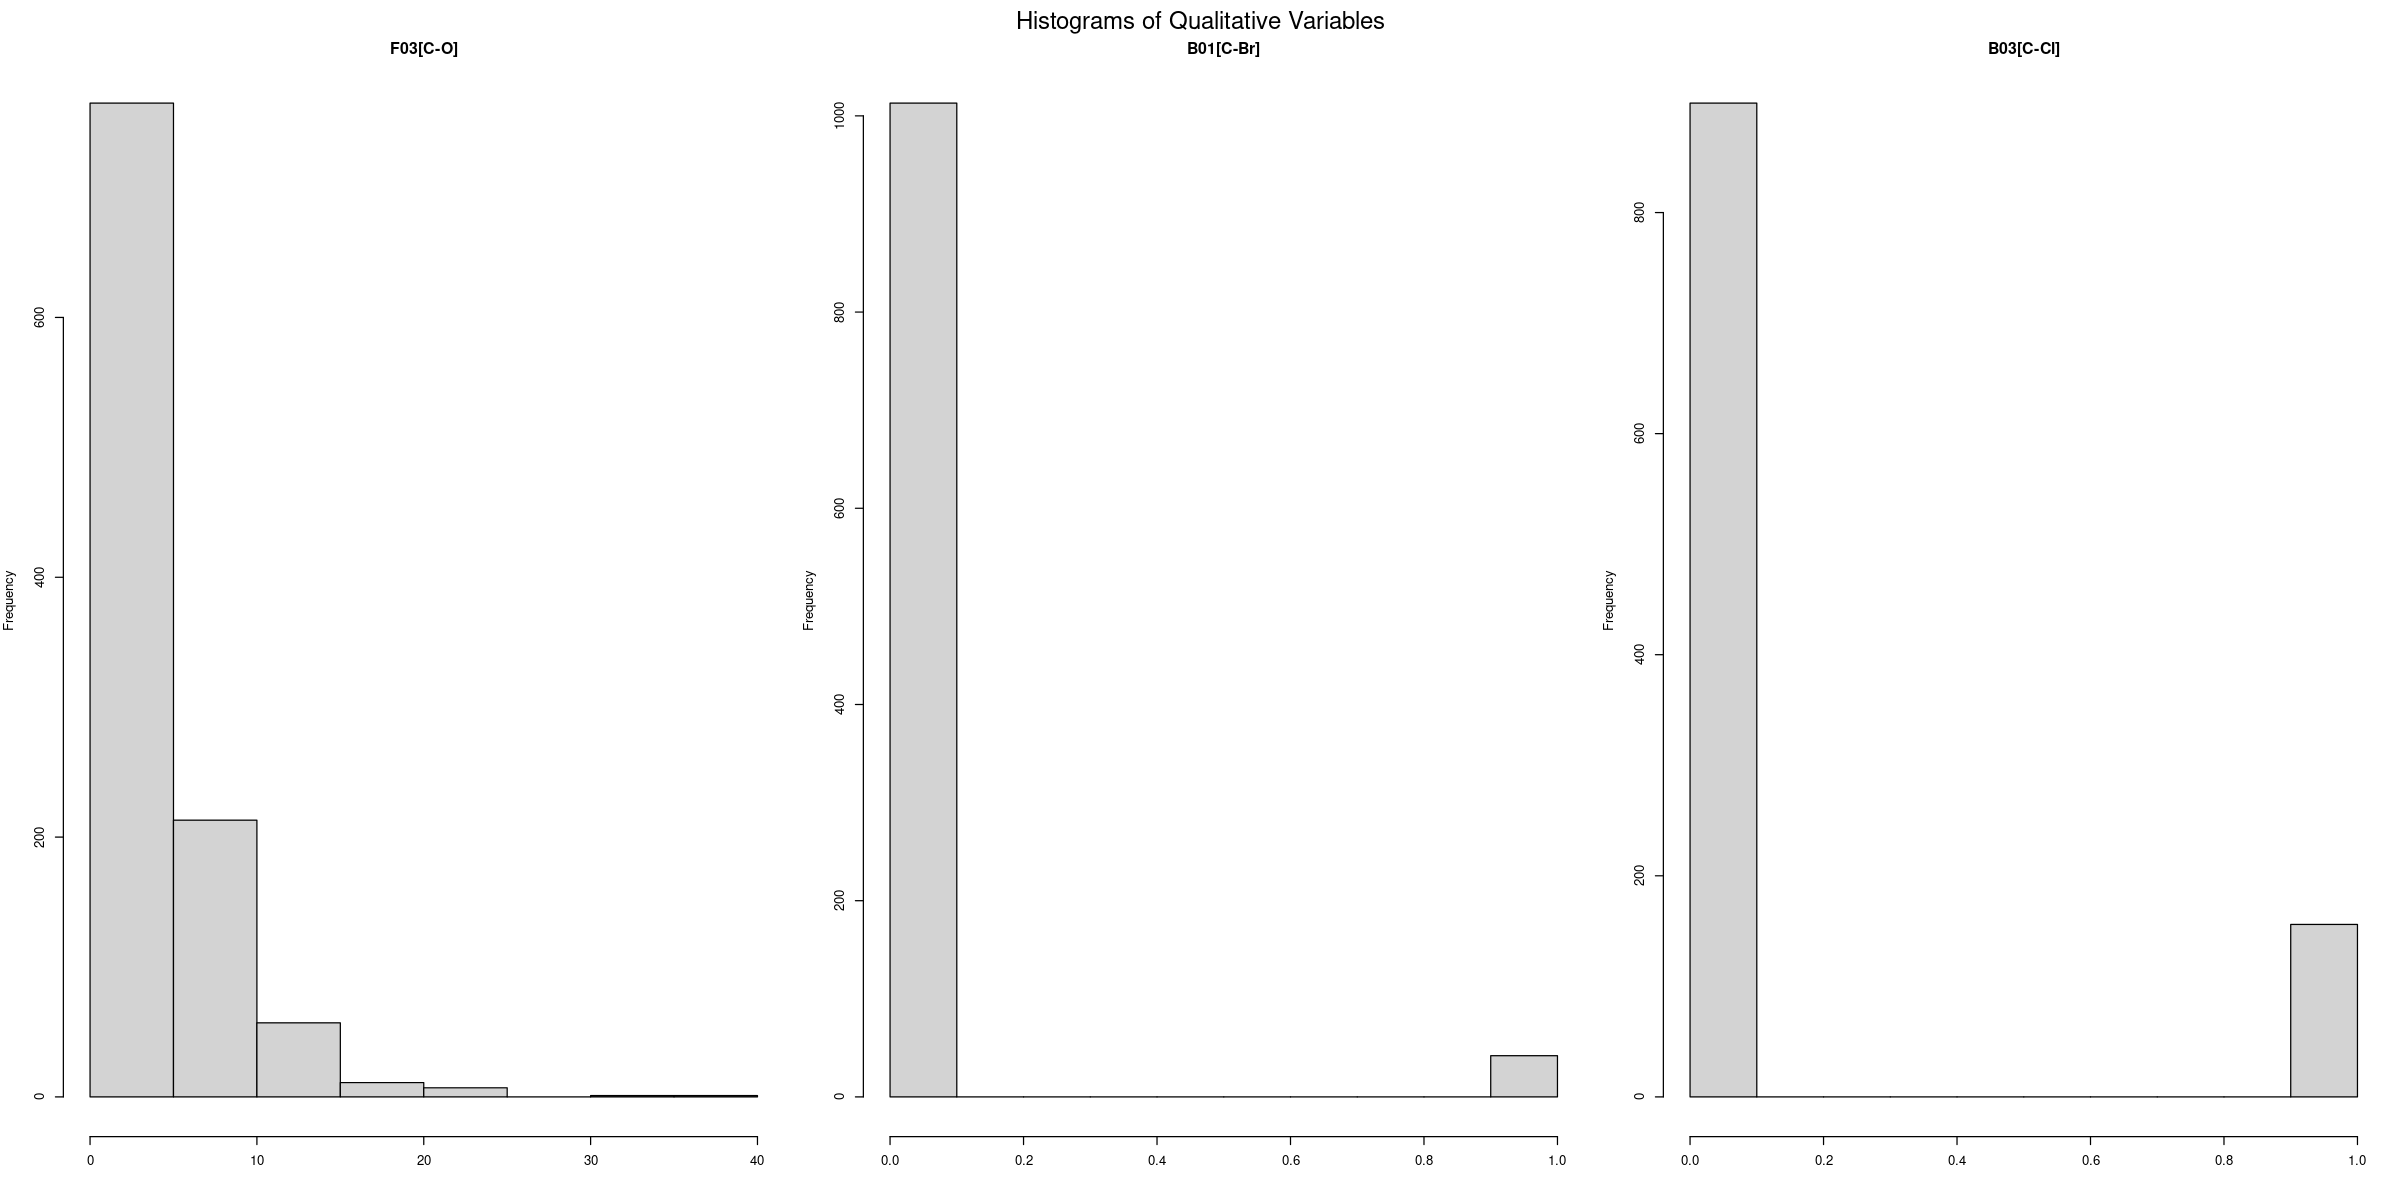

In [180]:
par(mfrow = c(1, length(quali_list)), mar = c(4, 4, 2, 1), oma = c(0, 0, 2, 0))
for (no in 1:length(quali_list)) {
  hist(data[[quali_list[no]]], main = quali_list[no], xlab = "")
}
mtext("Histograms of Qualitative Variables", outer = TRUE, cex = 1.2)

## Multidimensional

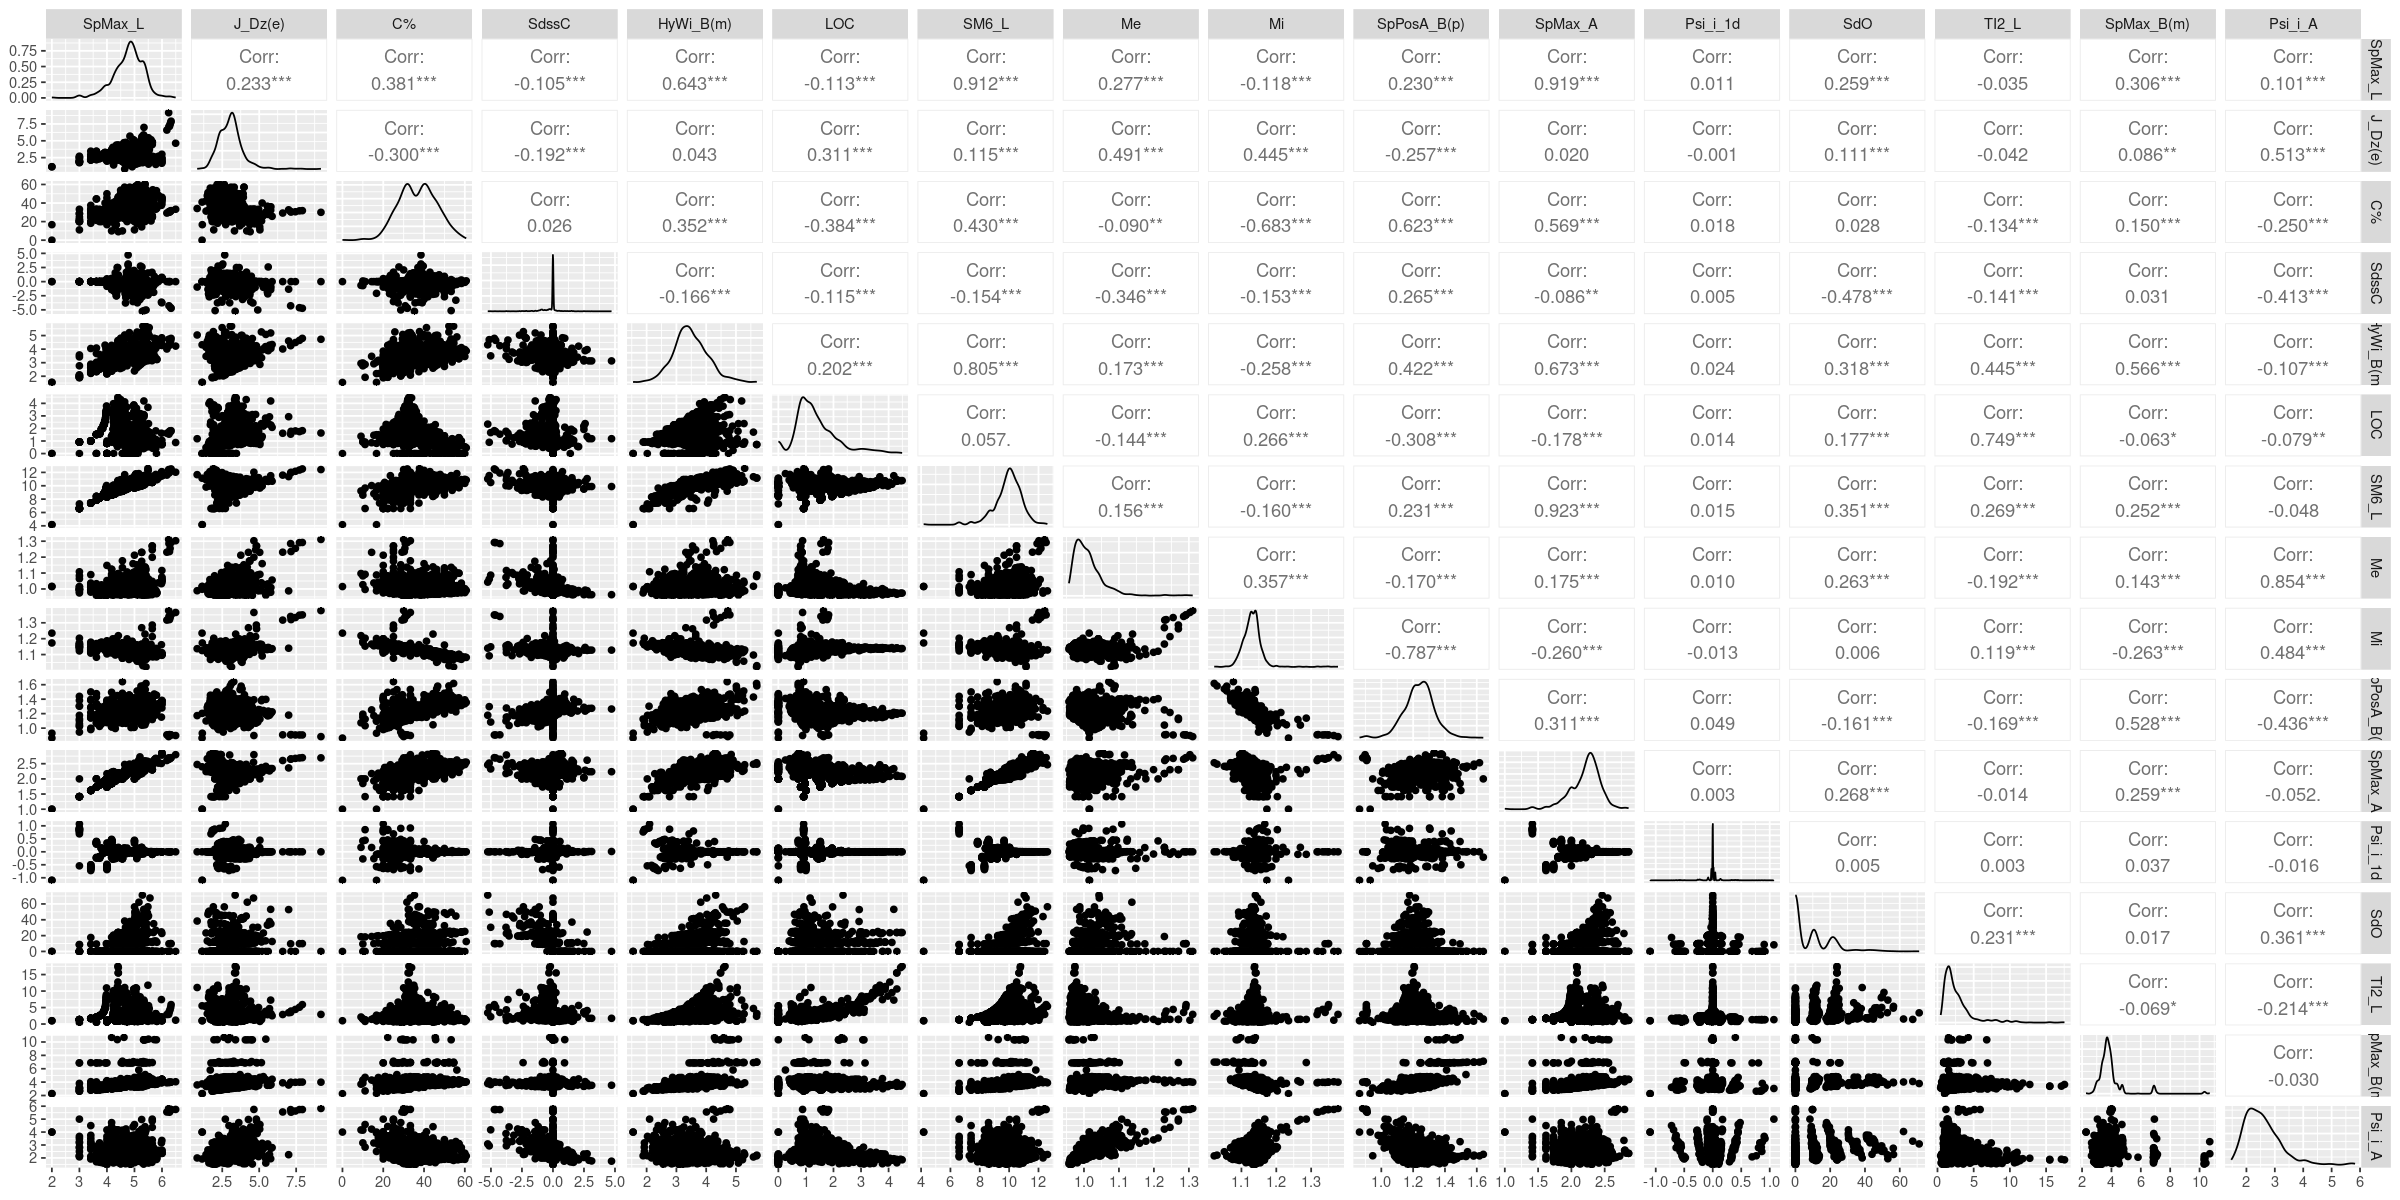

In [100]:
ggpairs(data[, quanti_index])

**Comment**: 

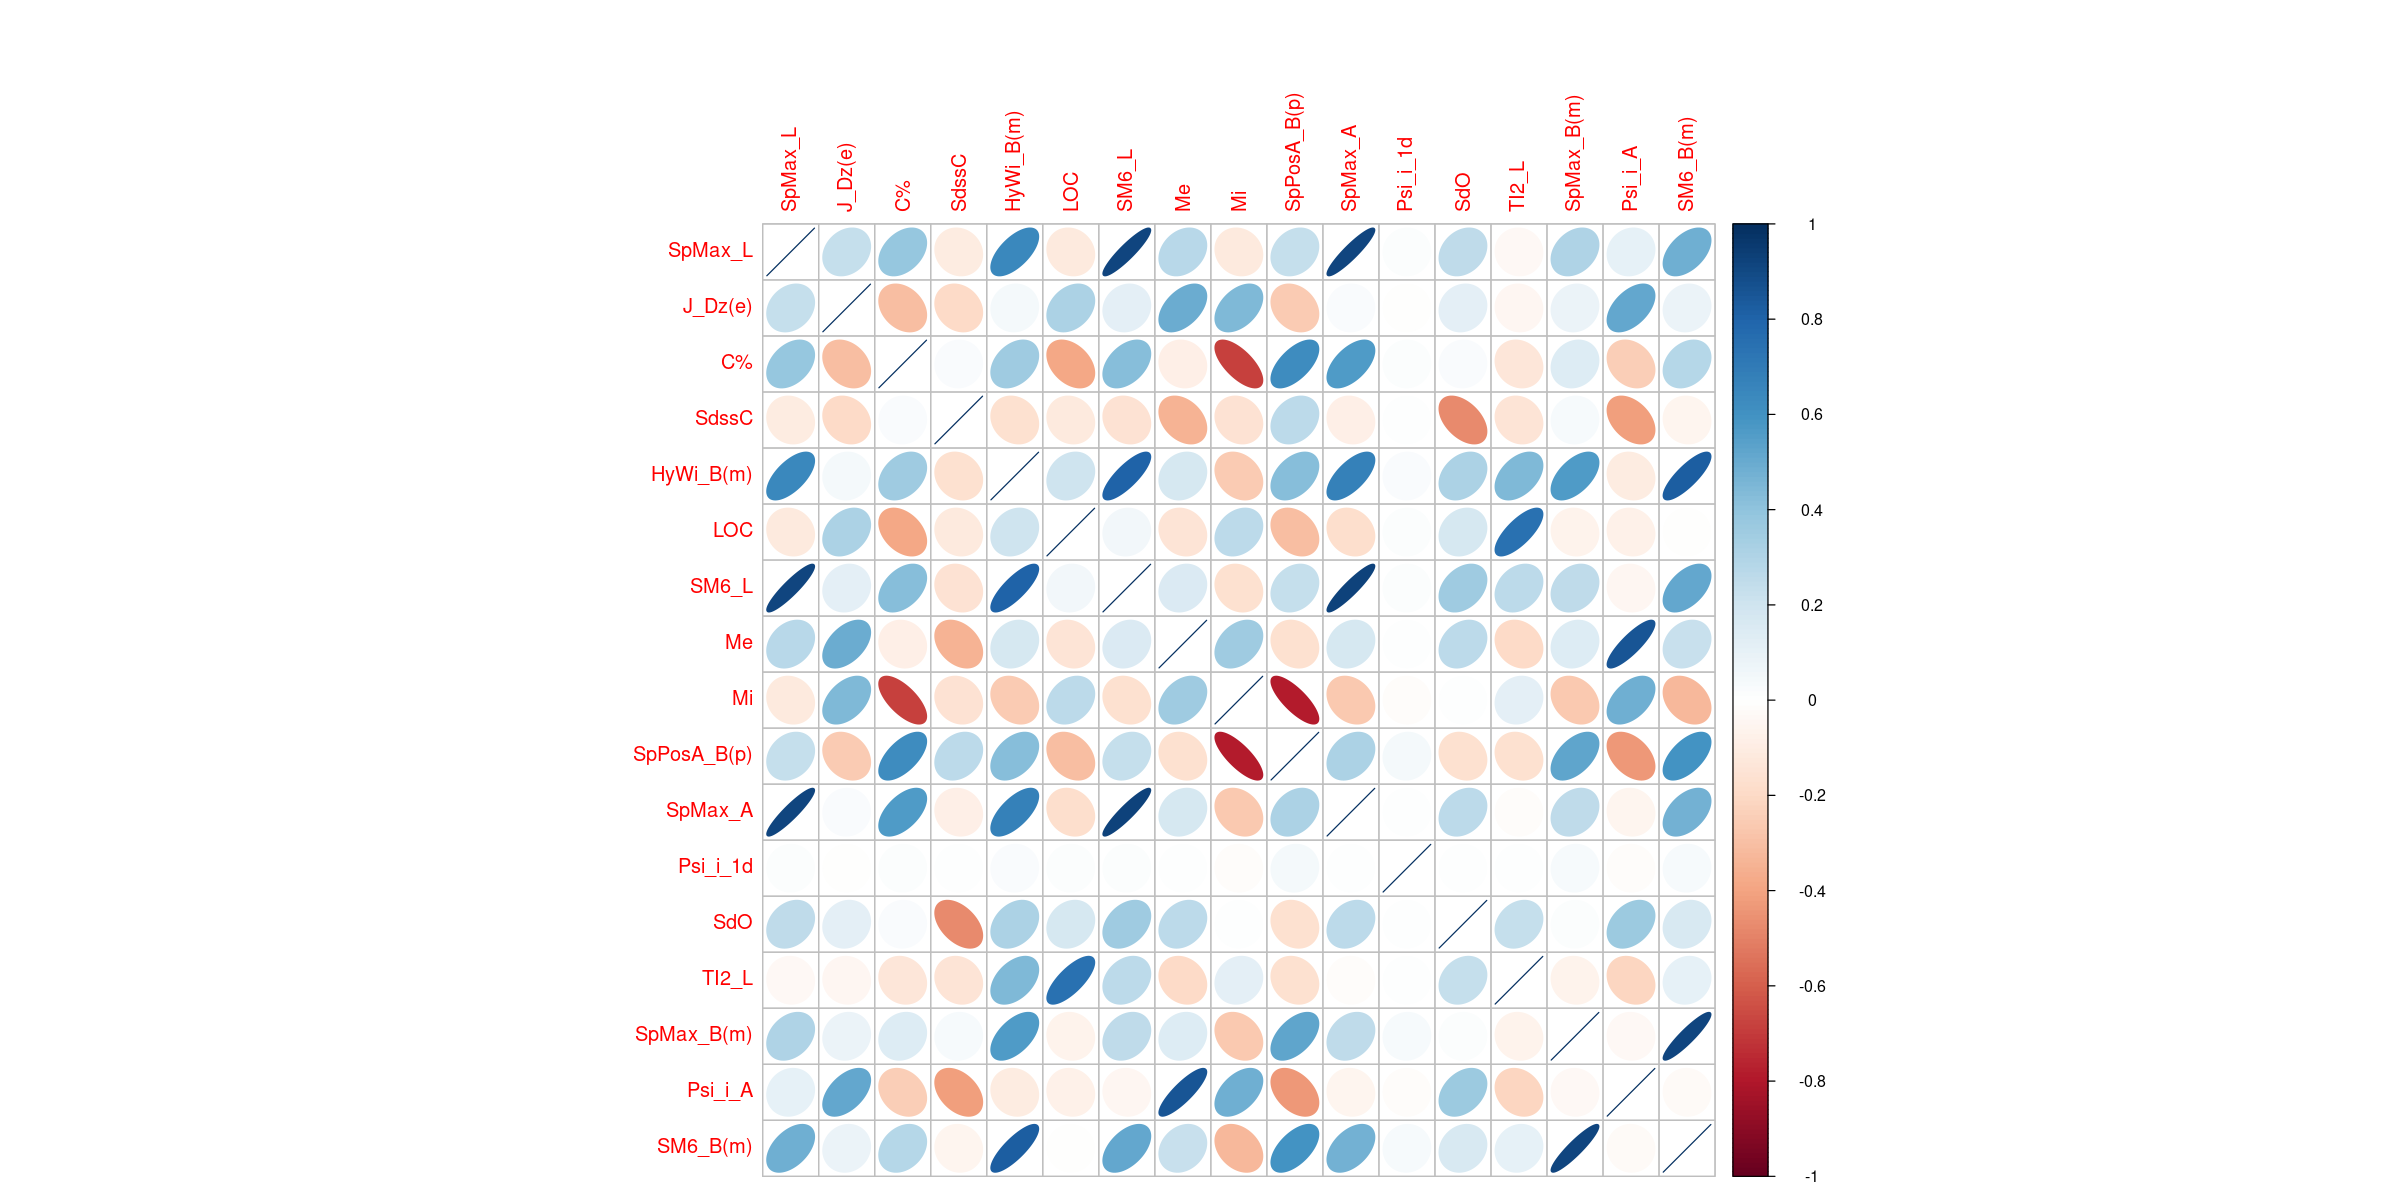

In [181]:
library(corrplot)
corrplot(cor(data[, quanti_index]),method="ellipse")

**Comment**: 

## Dependance between quantitative variables and response variable

In [182]:
# Data initial
data_non_biodeg <- data[biodeg$Response == 'NRB', ]
data_biodeg <- data[biodeg$Response == 'RB', ]

# Data transform
data_non_biodeg_transform <- data_transform[biodeg$Response == 'NRB', ]
data_biodeg_transform <- data_transform[biodeg$Response == 'RB', ]


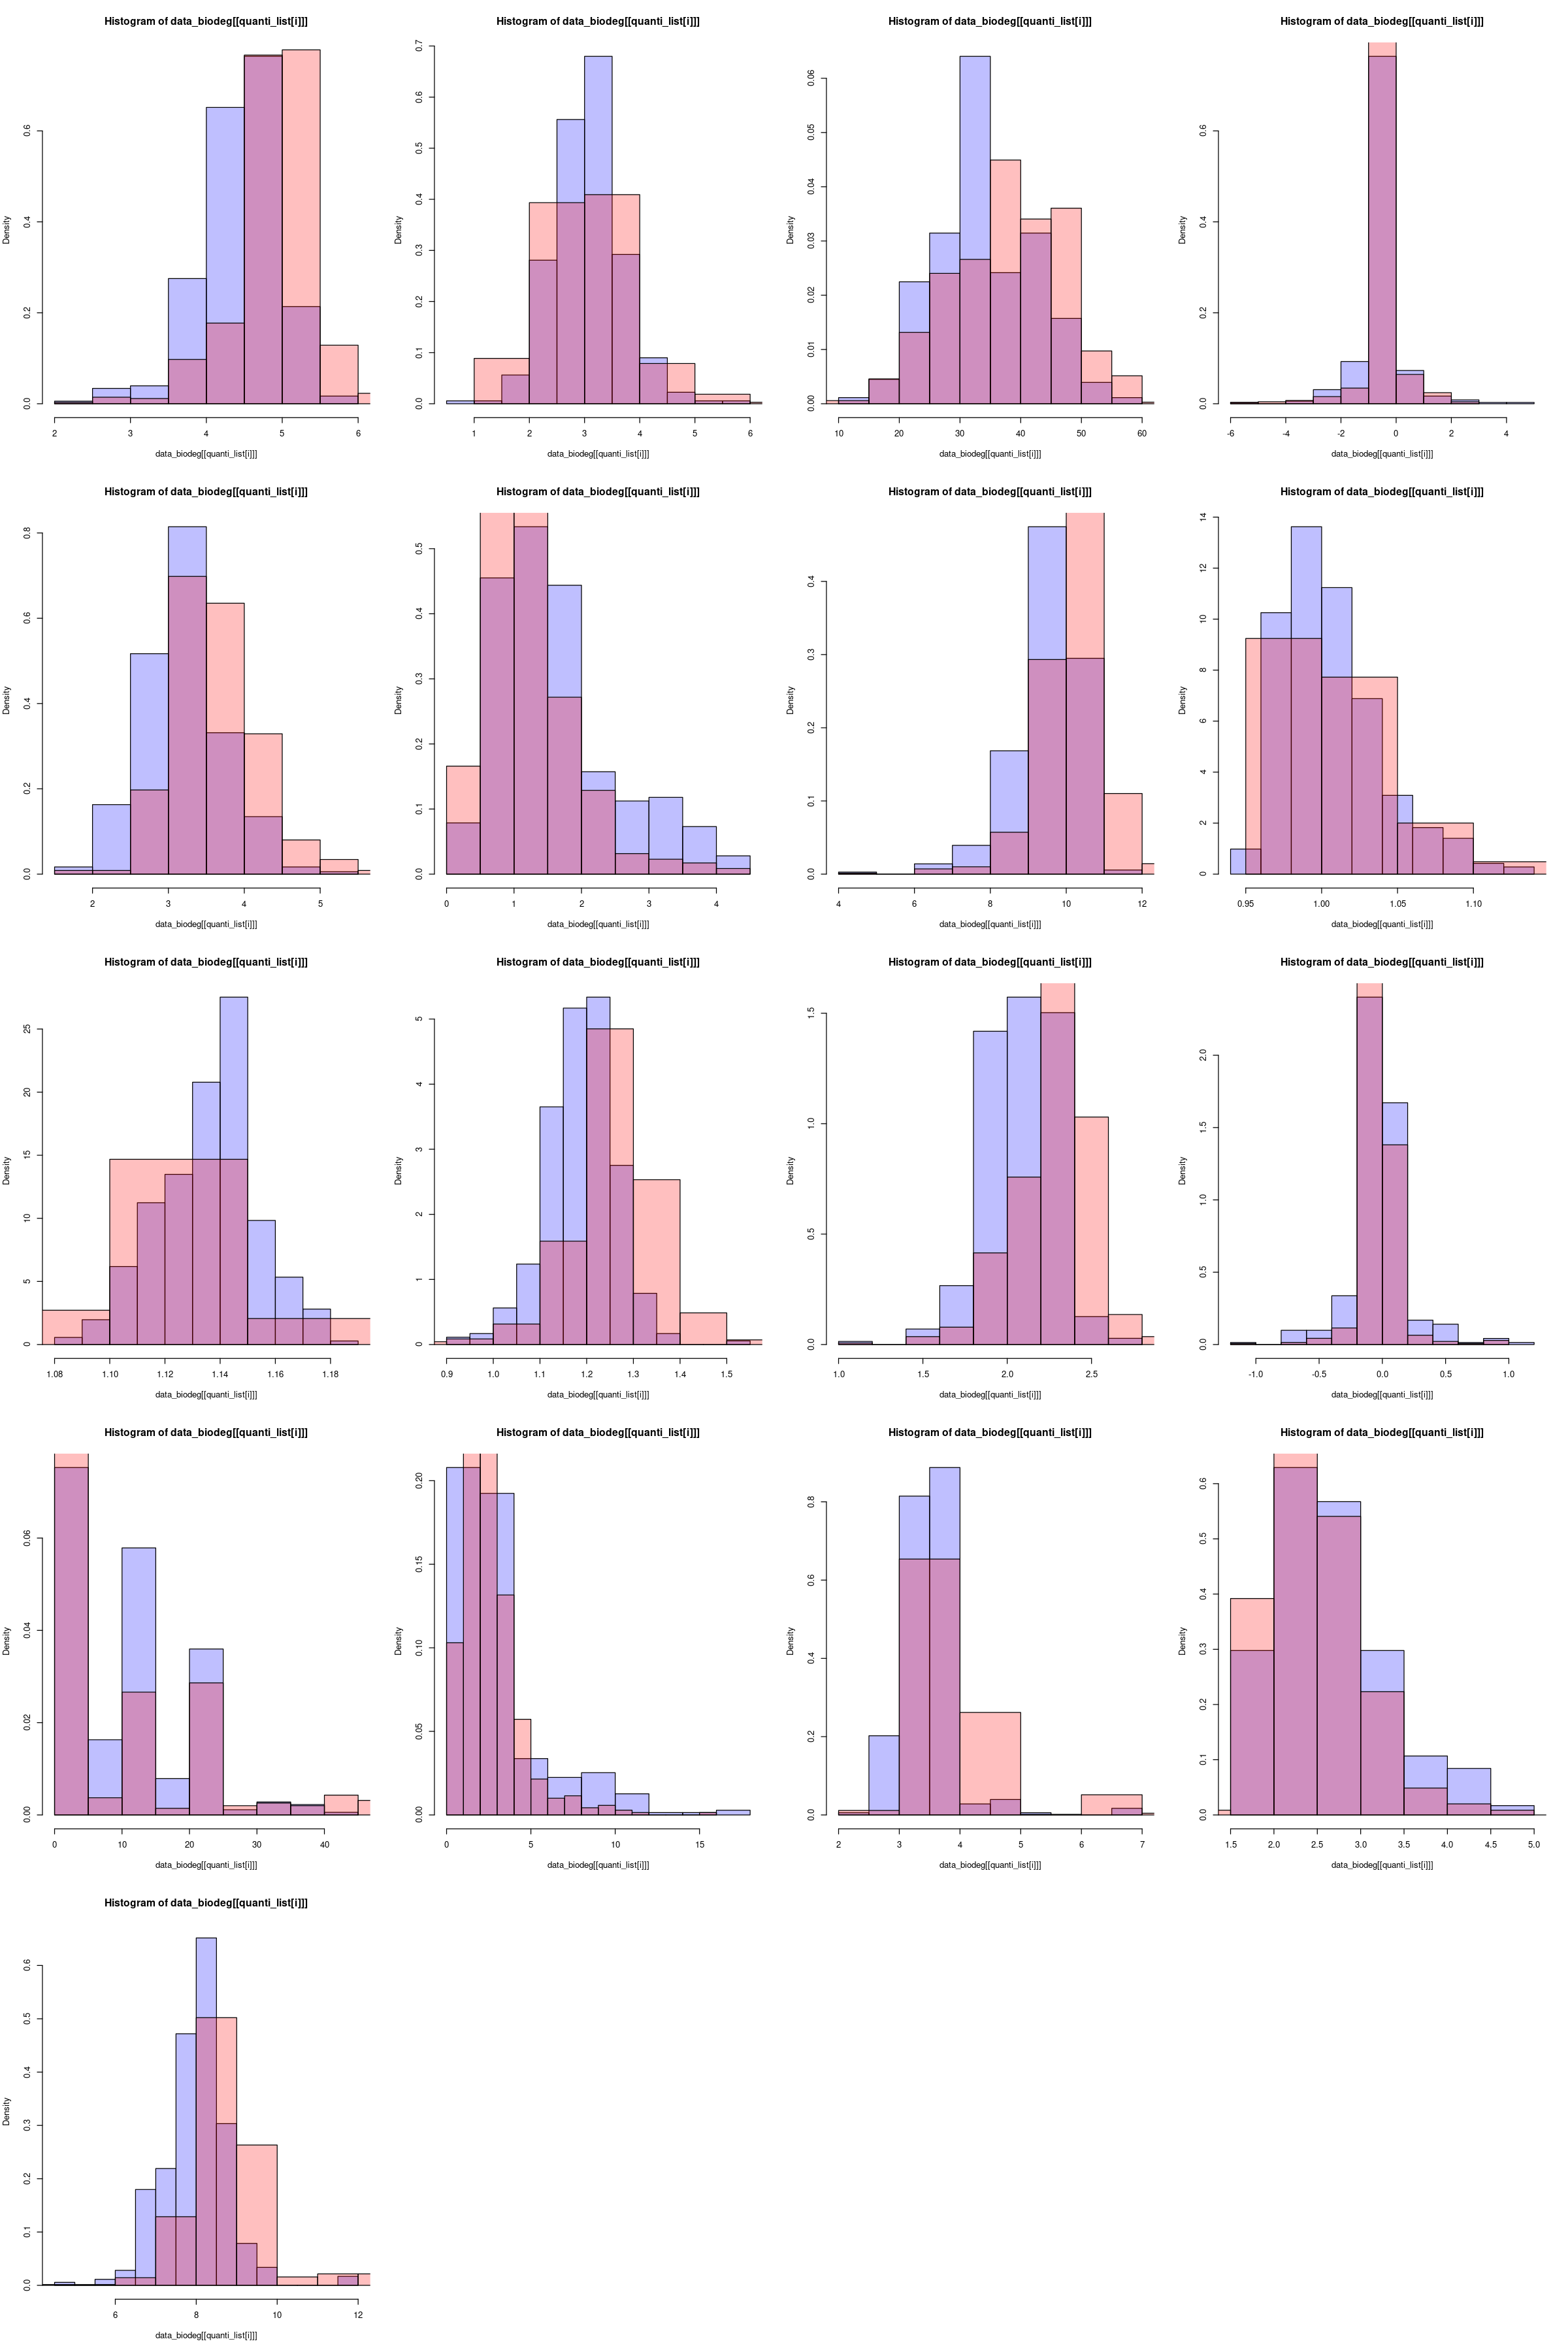

In [196]:
library(ggplot2)
options(repr.plot.width = 20, repr.plot.height = 30)

par(mfrow = c(5, 4))

for (i in 1:length(quanti_list)) {
    
    hist(data_biodeg[[quanti_list[i]]], col=rgb(0,0,1,1/4), prob = TRUE)
    hist(data_non_biodeg[[quanti_list[i]]], col=rgb(1,0,0,1/4), add = TRUE, prob = TRUE,main = quanti_list[i])
    
 }


Les variables quantitatives importantes déduites par les graphes au dessus : 
- SpMax_L
- C%
- SdssC
- HyWi_B(m)
- SpPosA_B(p)
- SpMax_A

## Dependance between qualitative variables and response variable

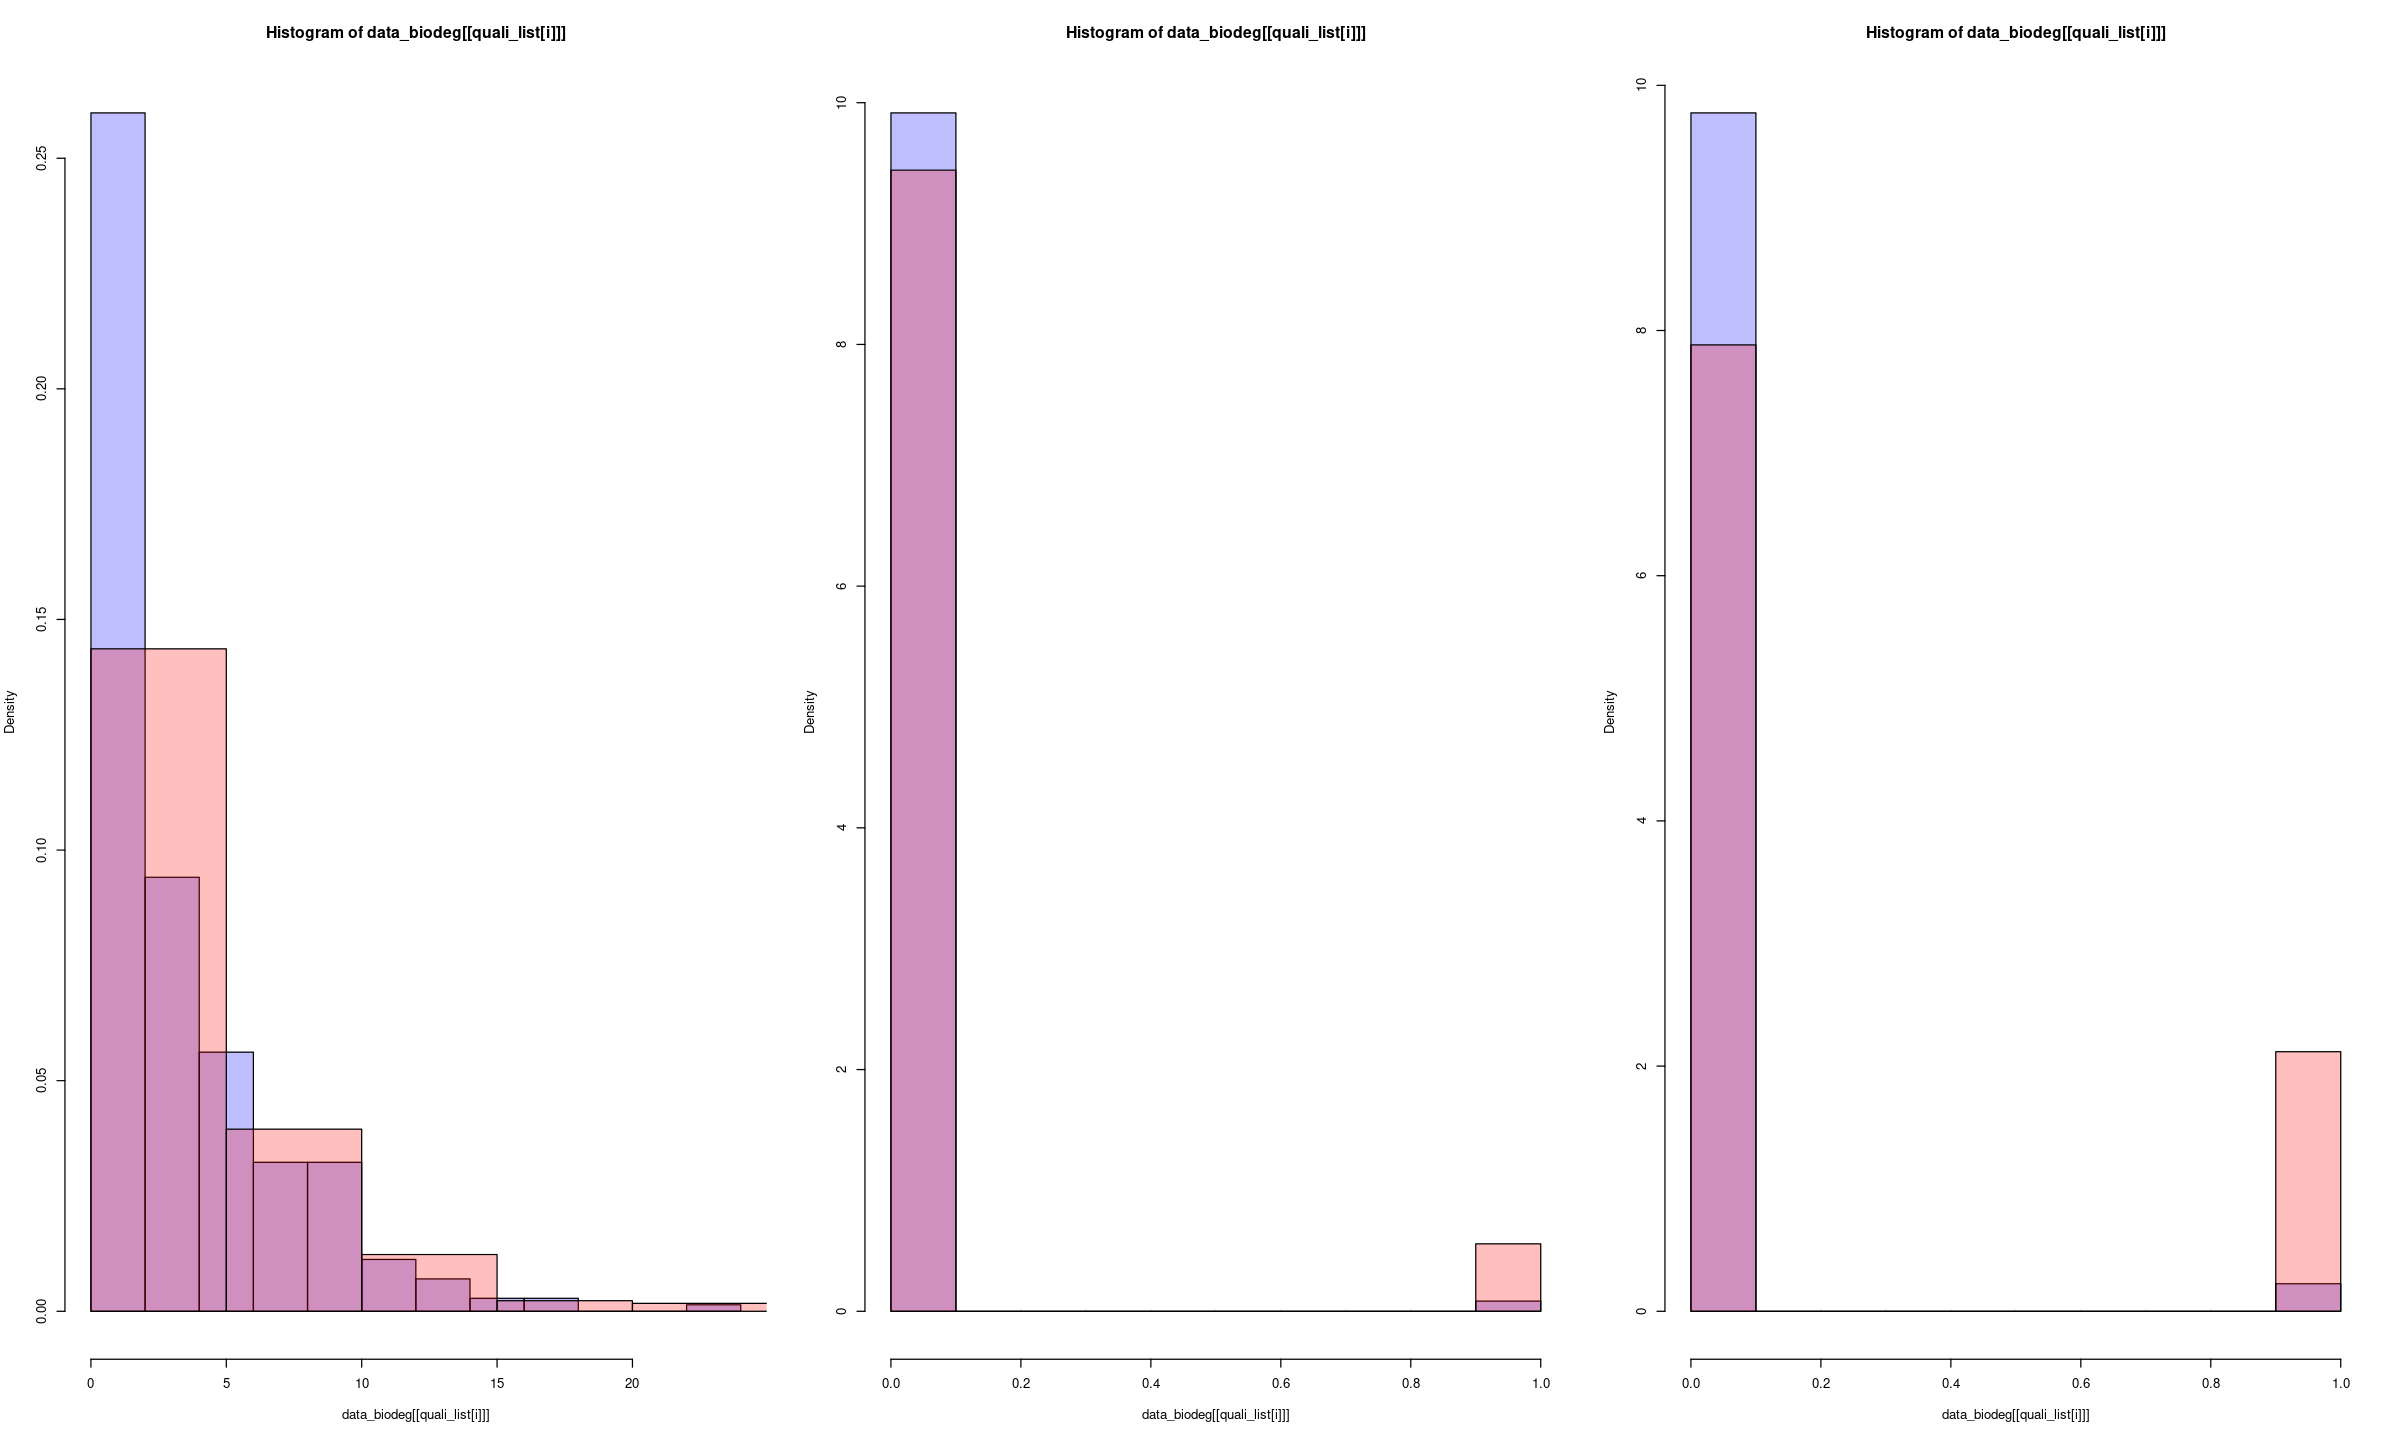

In [197]:
library(ggplot2)
options(repr.plot.width = 20, repr.plot.height = 12)

par(mfrow = c(1, 3))

for (i in 1:length(quali_list)) {
    hist(data_biodeg[[quali_list[i]]], col=rgb(0,0,1,1/4), prob = TRUE)
    hist(data_non_biodeg[[quali_list[i]]], col=rgb(1,0,0,1/4), add = TRUE, prob = TRUE,main = quanti_list[i])
    
 }

Pas de variables qualitatives importantes

In [204]:
data[,quali_index[1]][data[,quali_index[1]] > 0]

[1]  1  2  1  5  8  5  1  1  2  1  1  1  1  1  2  4  2  1  1  1  1  3  3 13  6
 [26]  8 10  3  4  5  6  5 10  6  4  2  2  2  3  2  2  3  4  3  1  4  6  4 10 14
 [51] 10 12  7  6  8  2  4 15  2  4  4  1  5  1  1  6  3  4  6 12  2  4  2  1  1
 [76] 12  2  1  1  2  2  1  2  2  6  6 17  2  1  5  8  4  4  8  6  8  2  7  6  6
[101]  4  5  3  1  4  1  1  2 10  6  2  4  4  4  2  2  6 16 10 13 12 10  4  8 10
[126] 18  4  4  9  7  8  8  6  2  4  6  2  2  6  2  8  9  9  1  1  1  2  1  6 10
[151]  8  4  1  5  4  4  2  5  4 10  2  1  3  3  1  2  4  2 12  8  9 12  4  1  1
[176]  2  6  3  4  3  7  3  2  1  1  2  5  3  4  2  4  6  2 23  3  9  1  4  2  2
[201]  2  2 12 14  8 10  3  3  2  2  4  8  4  8  3  4  4  2  2  8  9  9  8  2  2
[226]  4 14  7  8  4  3  4  2  8  4  6  8  8  4  4  2  3  2  6  5  4  8  6  6 16
[251]  6  6  2  2  4  9  6  2 12  4  4  8  4  8  8  8  4  4  8  4  4  2  3  2  2
[276]  3  3  3  4  3  3  4  6  2  3  6  5  6  6  6  7 11  2  2  2  2  2  5  2  2
[301]  2  2  2  2  2  6  4  4  2 12  6  6  2  5 12  2  8 11  4  6  6  8  4 10  9
[326]  4  3  8  4 10  3  4  2  8 14 32  1  4  6  6  6  2  6  8  3  6  9  3  2  6
[351] 10  4  8 15 18  8 10  3  9  9 15  4 12 40  6  6 12  8  4 12  8 12 18  8  8
[376] 12  2  6  2  6 24  6  5  6  6  6  2  4  2  6  9  4  2 14 24  3  4  2  4  2
[401]  6 12  8  6  3 18  8  4  4  4  4  4  4  2  4 10 12  3  6  2  4 10  5  4  2
[426] 18 15  7 12  2  2  4  3  4  3  6  9 11  8  8 11 11  8  3  2  2 12  6 12  8
[451]  8 11  3 15  2  1  4  1  6  9 12  1  3  2  4  2  2 24  1  6 18 21  5  1 16
[476] 24  7  5  2  9 10 10  6  9  6  8  4  5  9  4  3  2  3  8  8  4  4  4  4  2
[501]  3  6 14  2  7  2  5  2  1 12  4  8  8  8  3 11  8  3  4  4  7  8  9  6  9
[526]  9 13  4  2 12  6 14  9  9  9  7  9  4  4  2  1  1  2  6 10  4  4  2  6  4
[551]  4 10  2  6  4  6  1  1  2  1  4  3  6  2  6  5  7  1  2  3  4  2  3 10  6
[576]  6  2  2  3  4  3 10  6  1  8  7 12 14  2  9  3  3  3  2  1  4  6  4  2  4
[601] 12  9  8  1  7  2  2  3 10  3  2  2  4 12 10  3 15  2  3  8  8  4  6  4  4
[626]  4  2  1  6  1  5  4 15  4  8  8  6 12 10  2  1  3  9  2 12  3  8  6  6  2
[651] 16  6  2  4 11  4 12  4  8  8  5  1  1  4 12  2  1  4  4  4  2  2  2 11  6
[676] 10  2 21  9

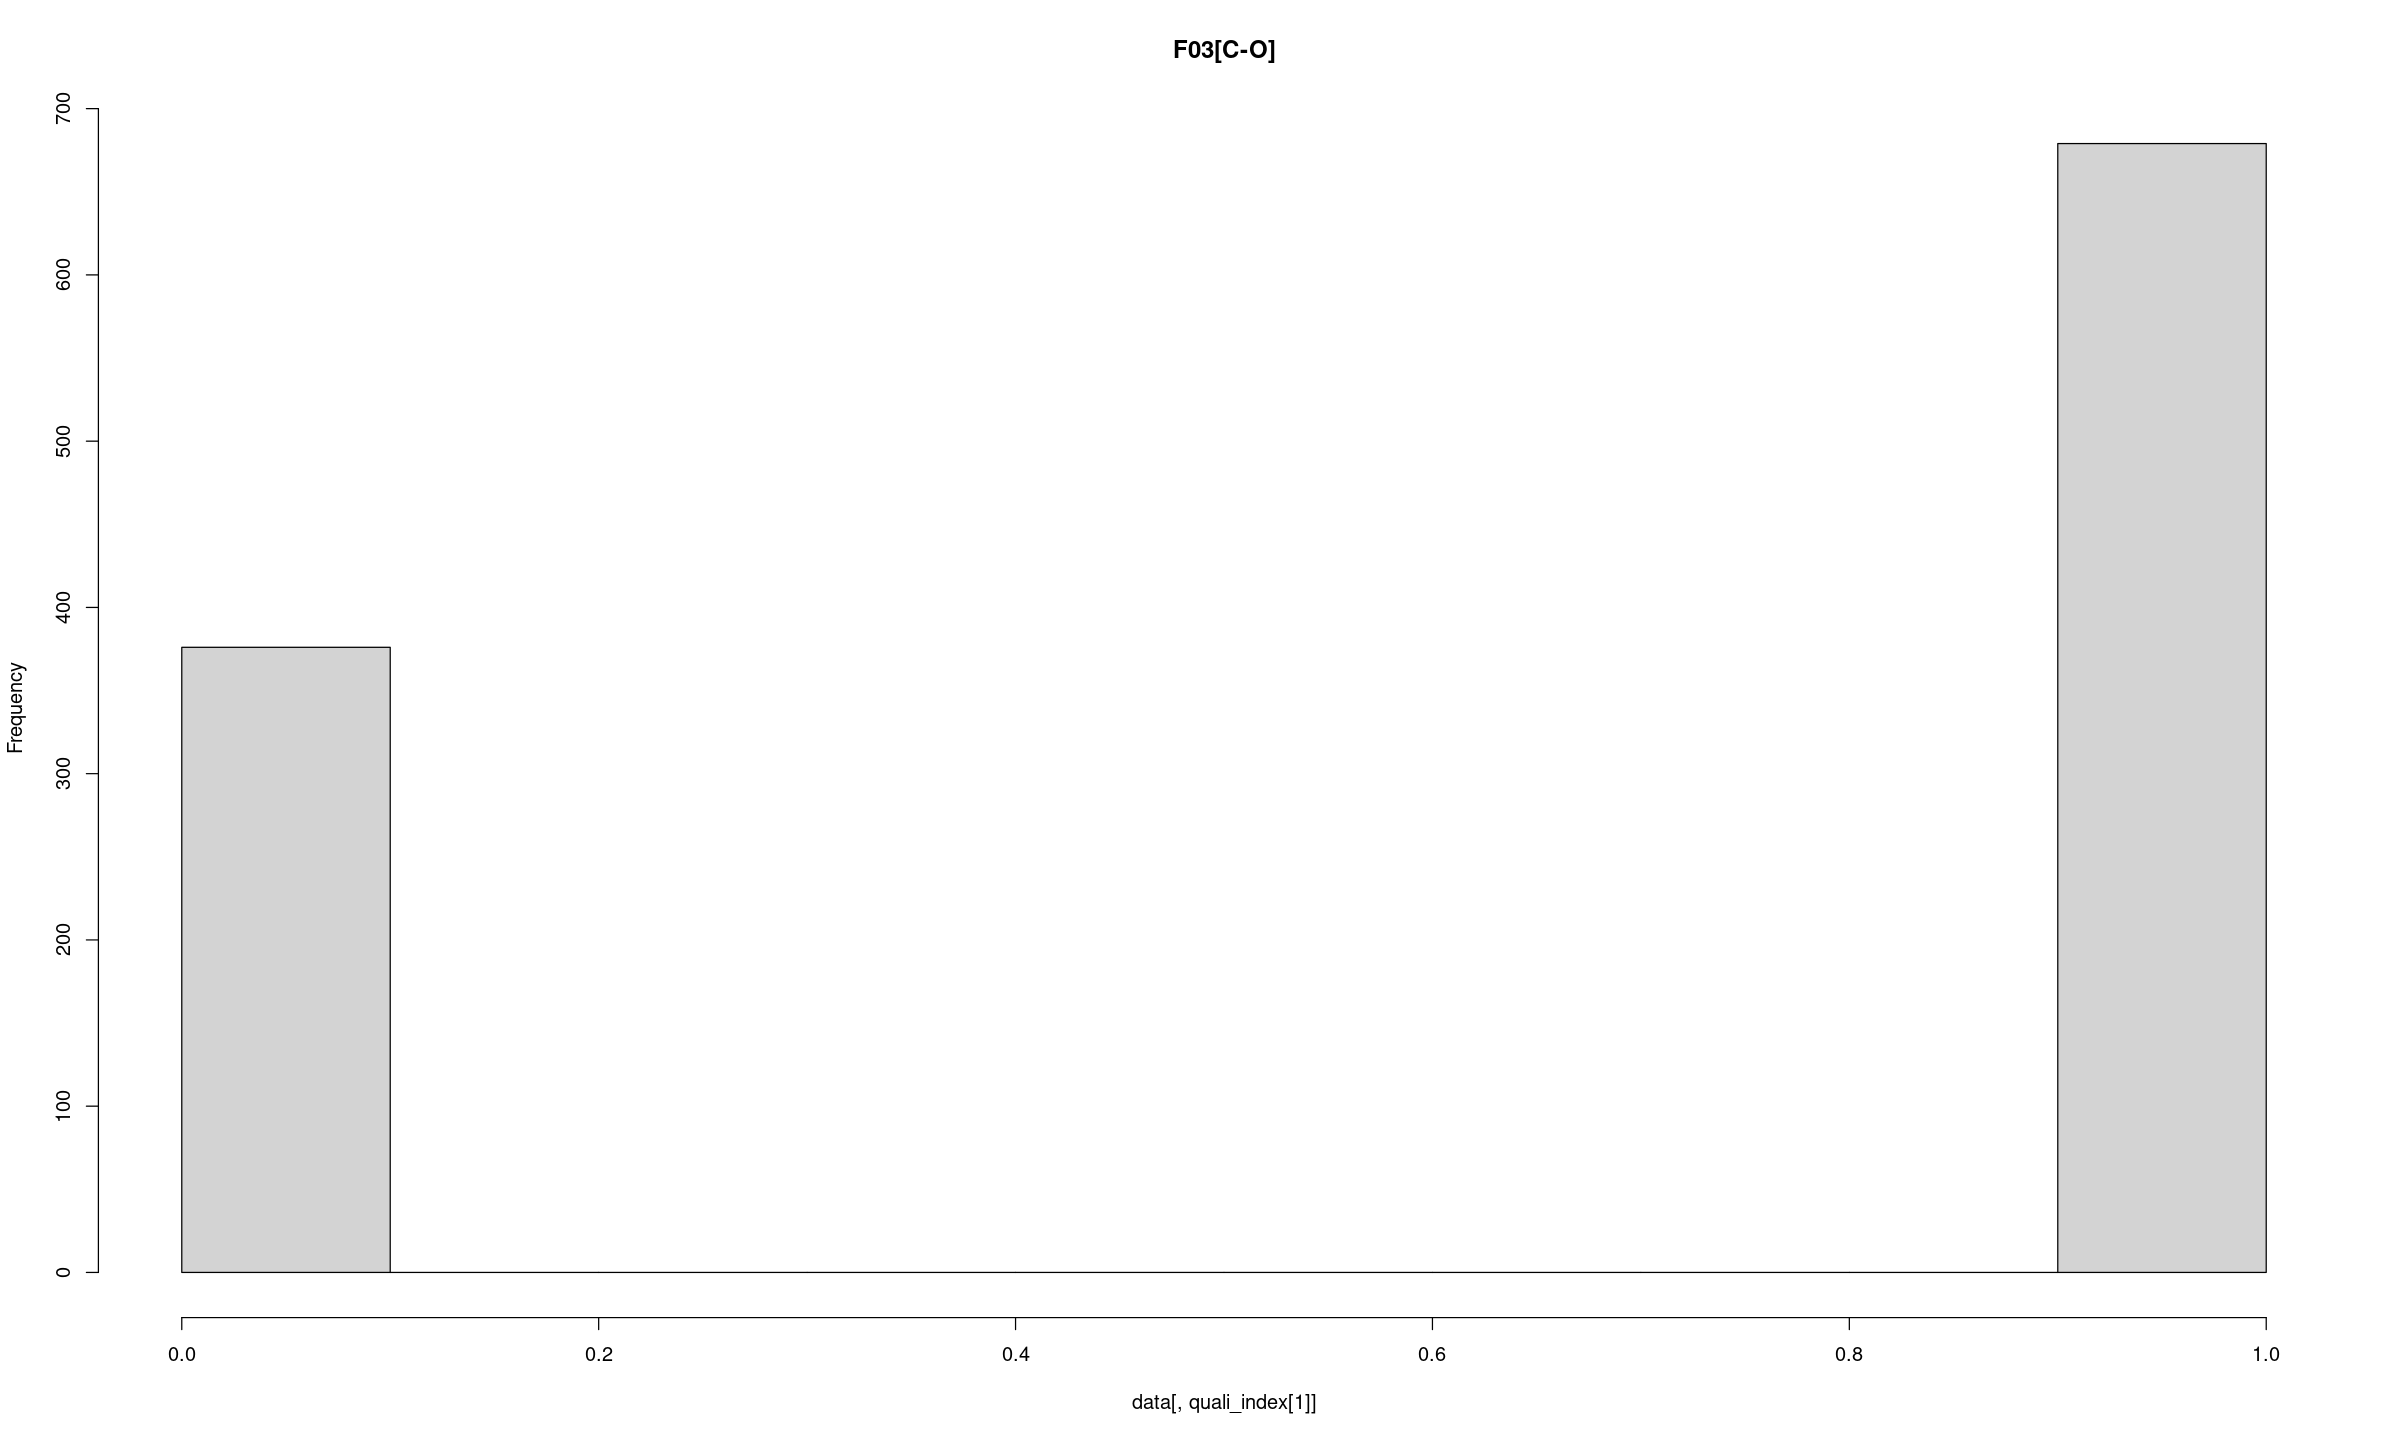

In [208]:
data[,quali_index[1]][data[,quali_index[1]] > 0] <- 1 
hist(data[, quali_index[1]], main=quali_list[1])
data_transform[, quali_index[1]][data_transform[, quali_index[1]] > 0] <- 1 


In [209]:
data$'F03[C-O]' <- factor(data$'F03[C-O]', ordered = TRUE)
data$"B01[C-Br]" <- factor(data$"B01[C-Br]")
data$"B03[C-Cl]" <- factor(data$"B03[C-Cl]")

data_transform$'F03[C-O]' <- factor(data_transform$'F03[C-O]', ordered = TRUE)
data_transform$"B01[C-Br]" <- factor(data_transform$"B01[C-Br]")
data_transform$"B03[C-Cl]" <- factor(data_transform$"B03[C-Cl]")

## 2.4. Principal Component Analysis

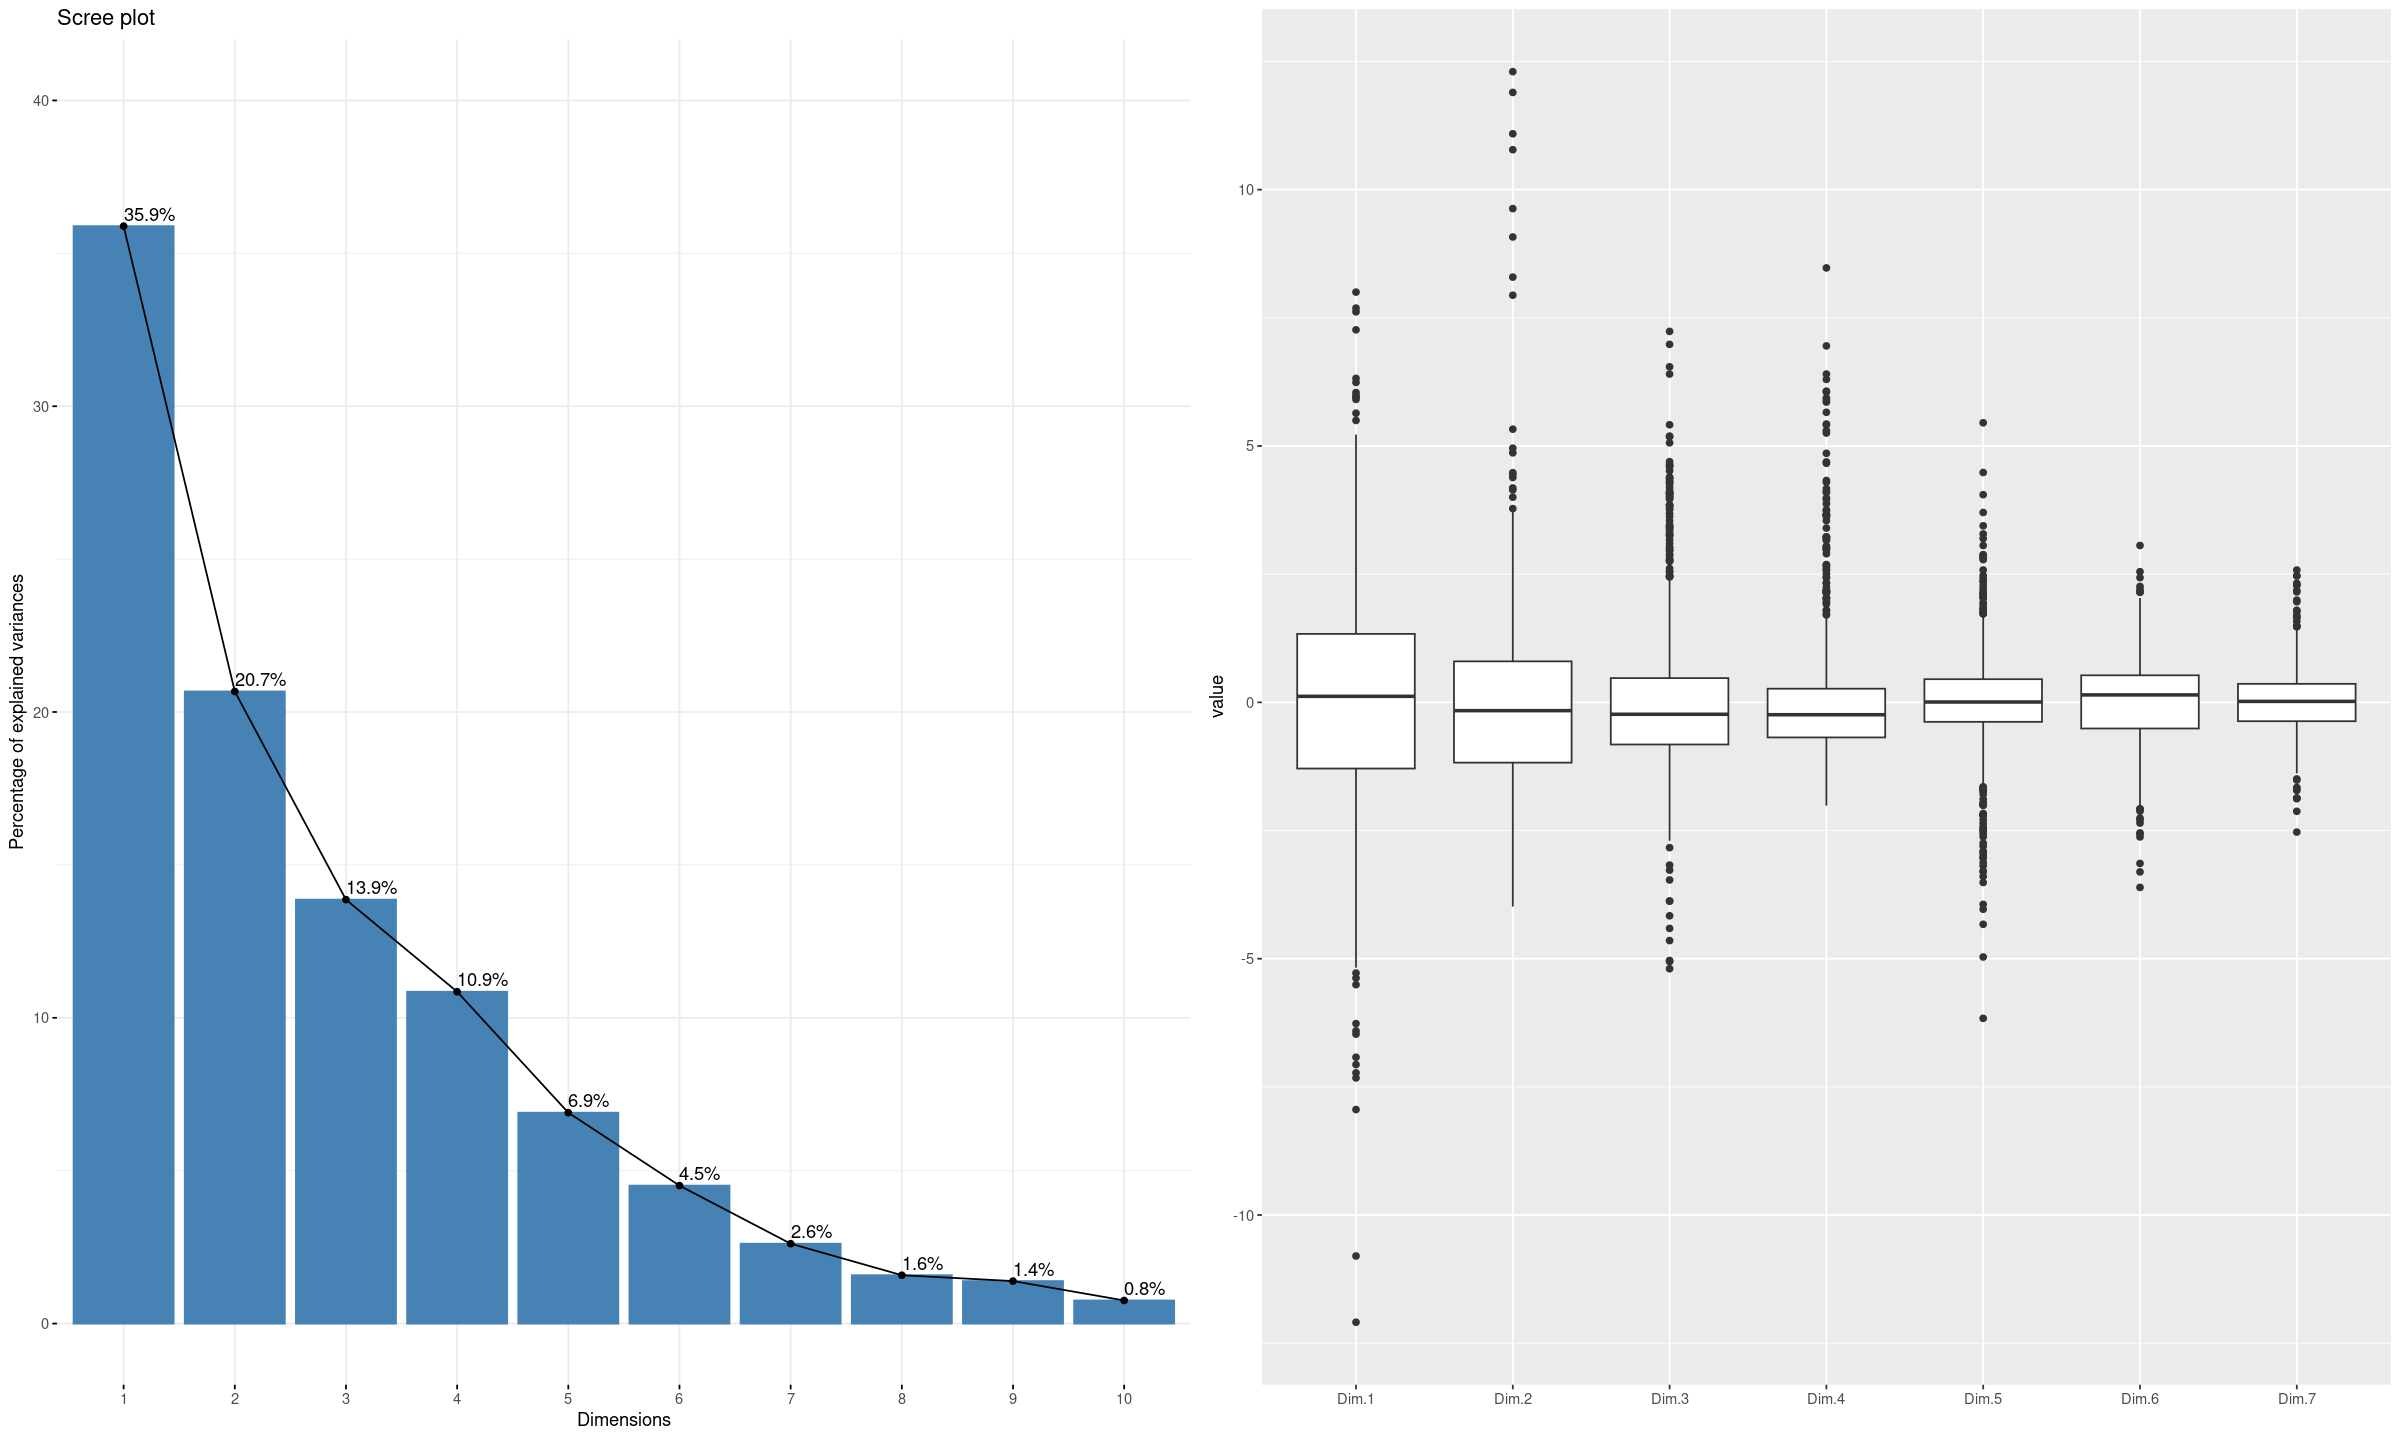

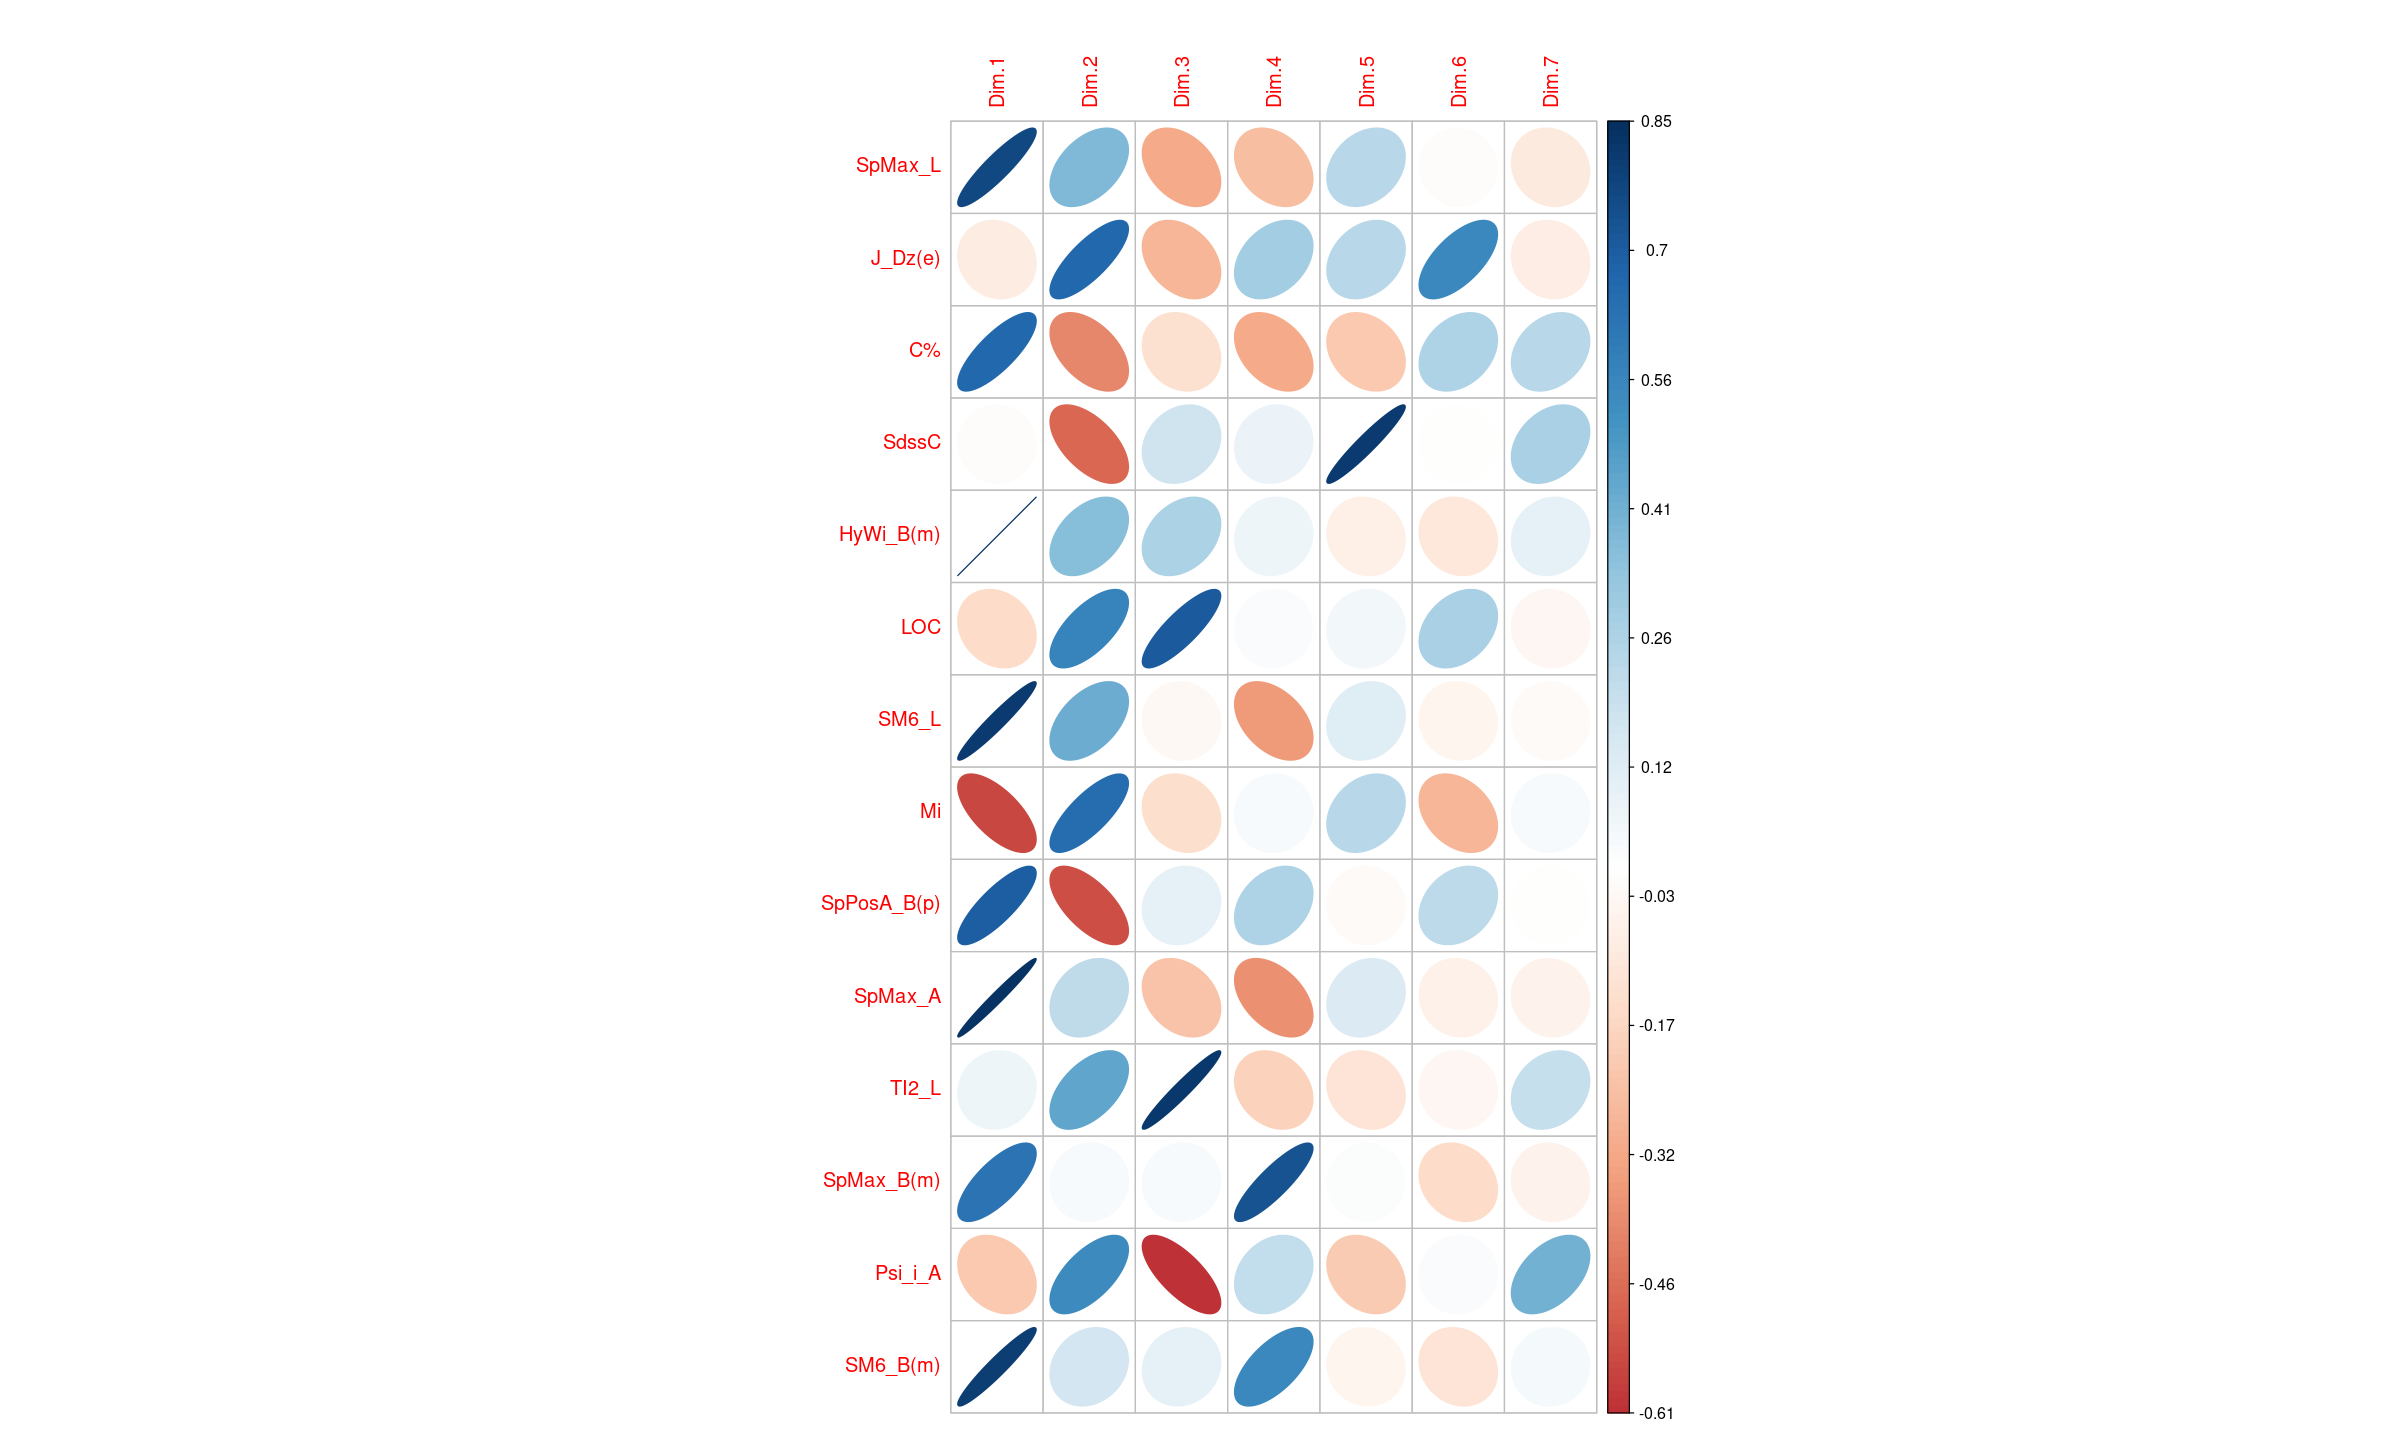

In [216]:
# ACP réduite
library(FactoMineR)
acp <- PCA(data[, quanti_list], scale.unit = TRUE,
           graph = FALSE, quali.sup = quali_index, ncp = 7)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)
# 
library(corrplot)
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

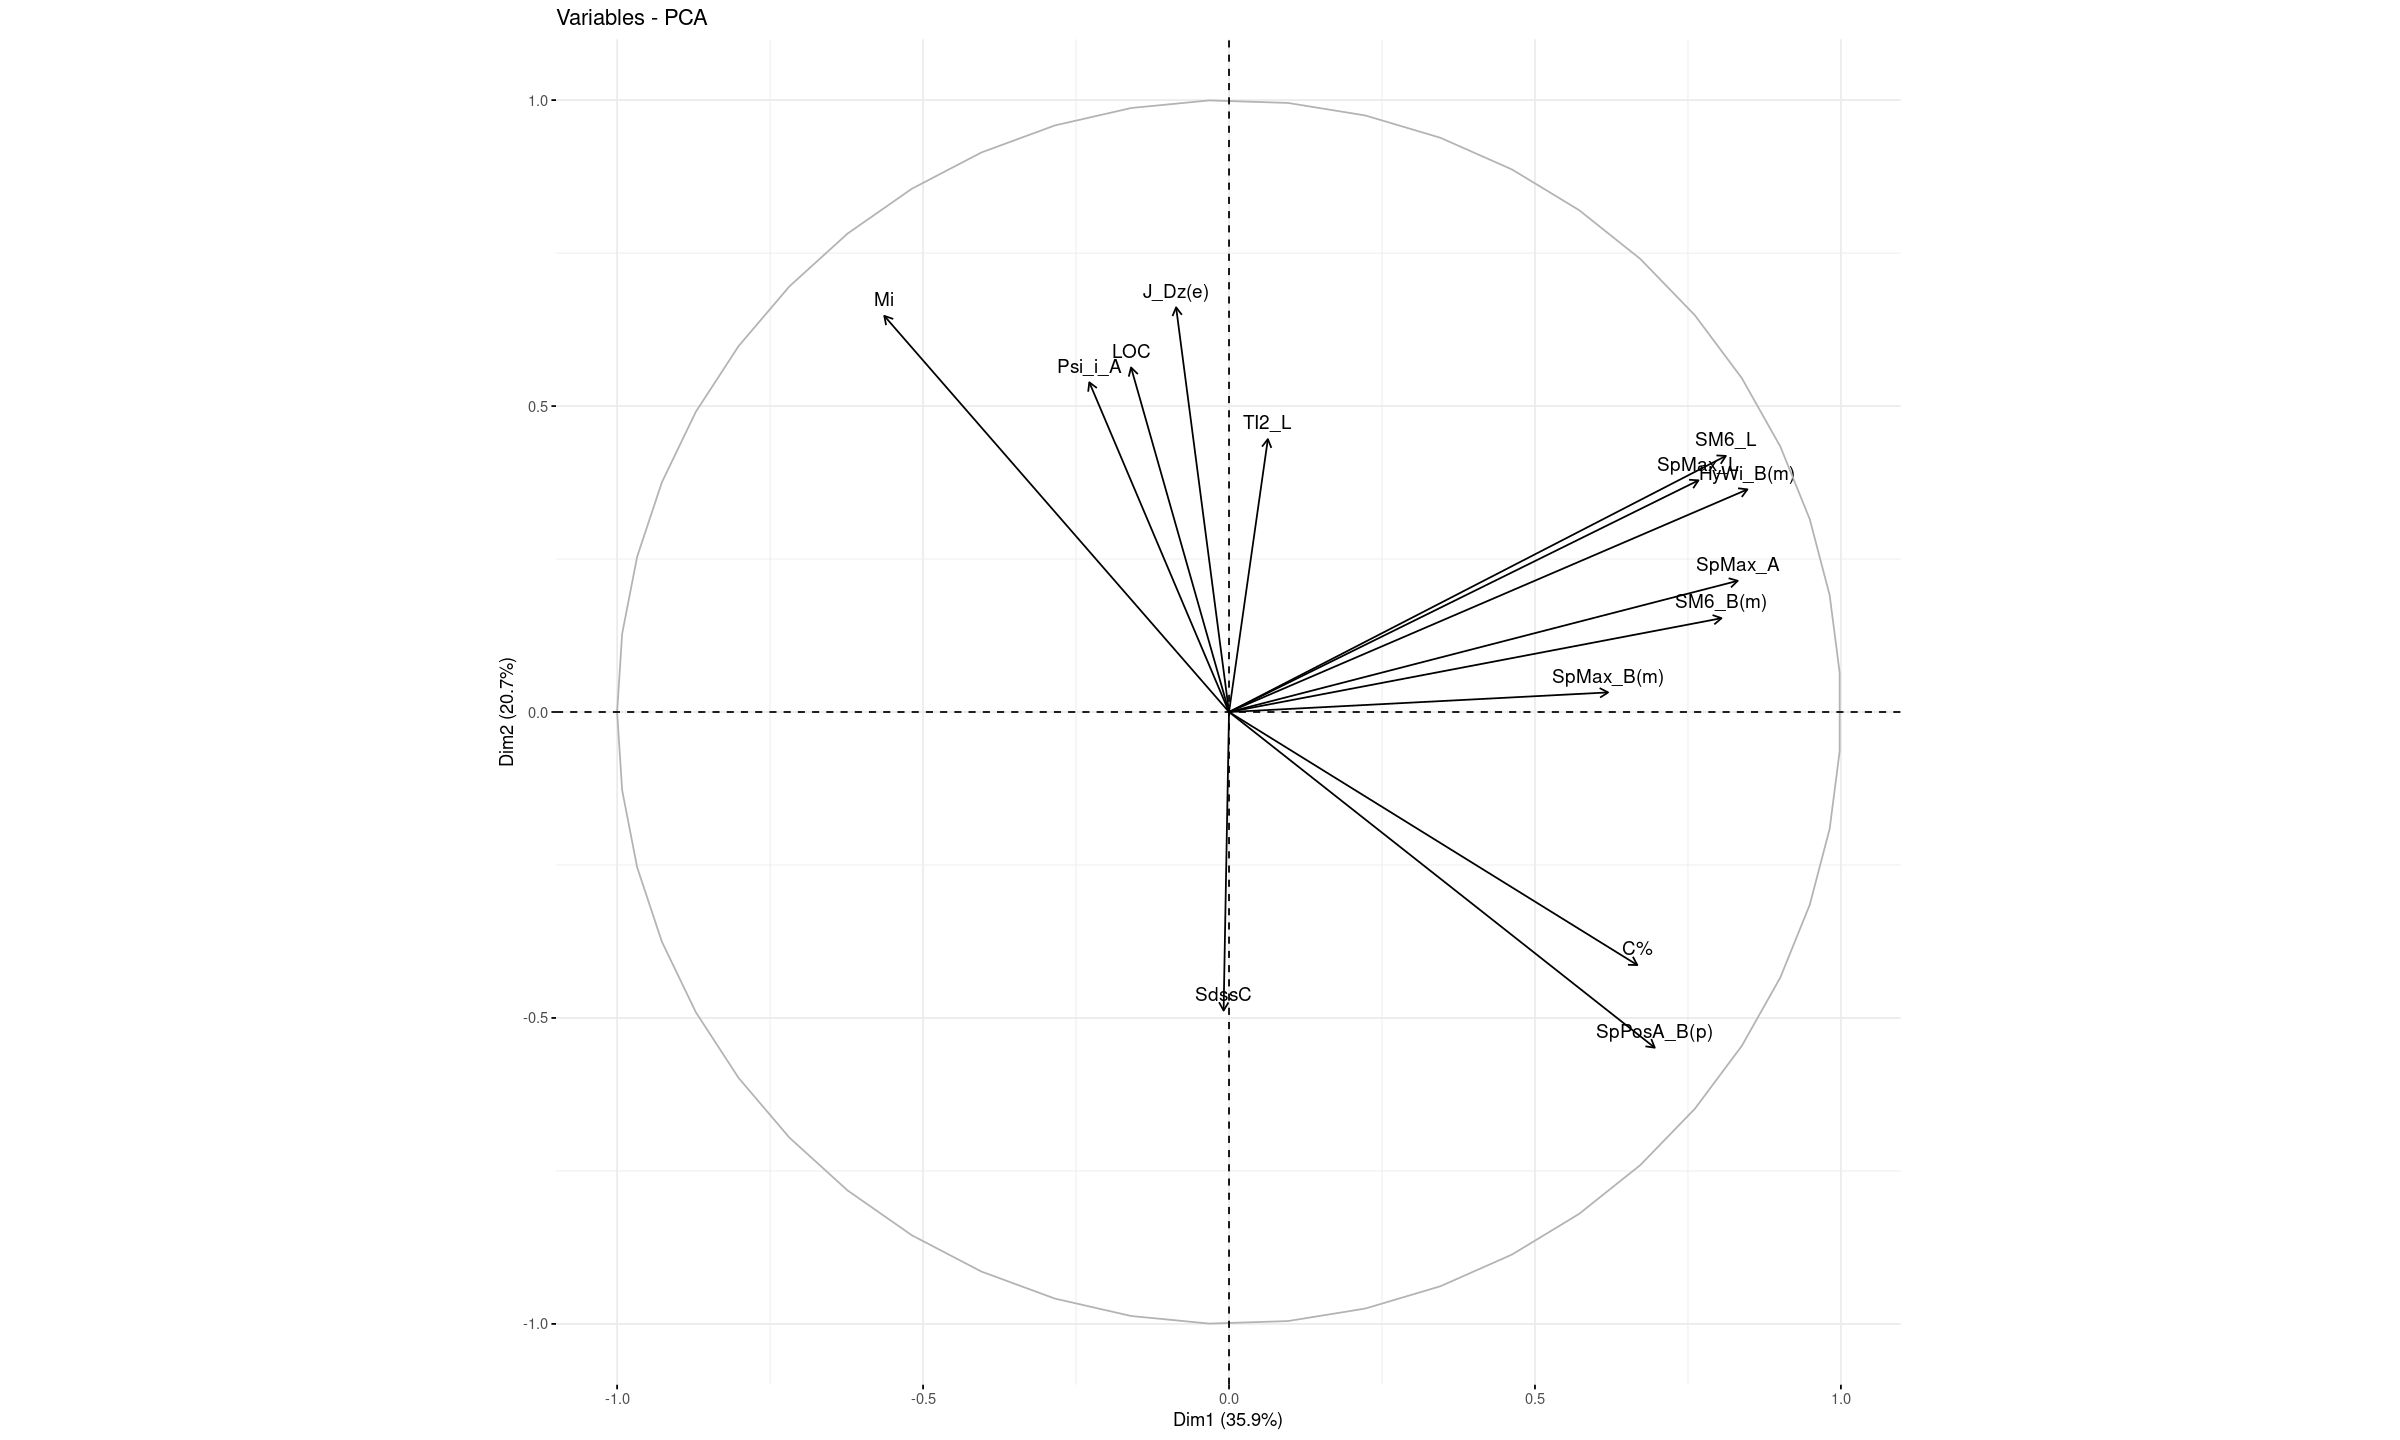

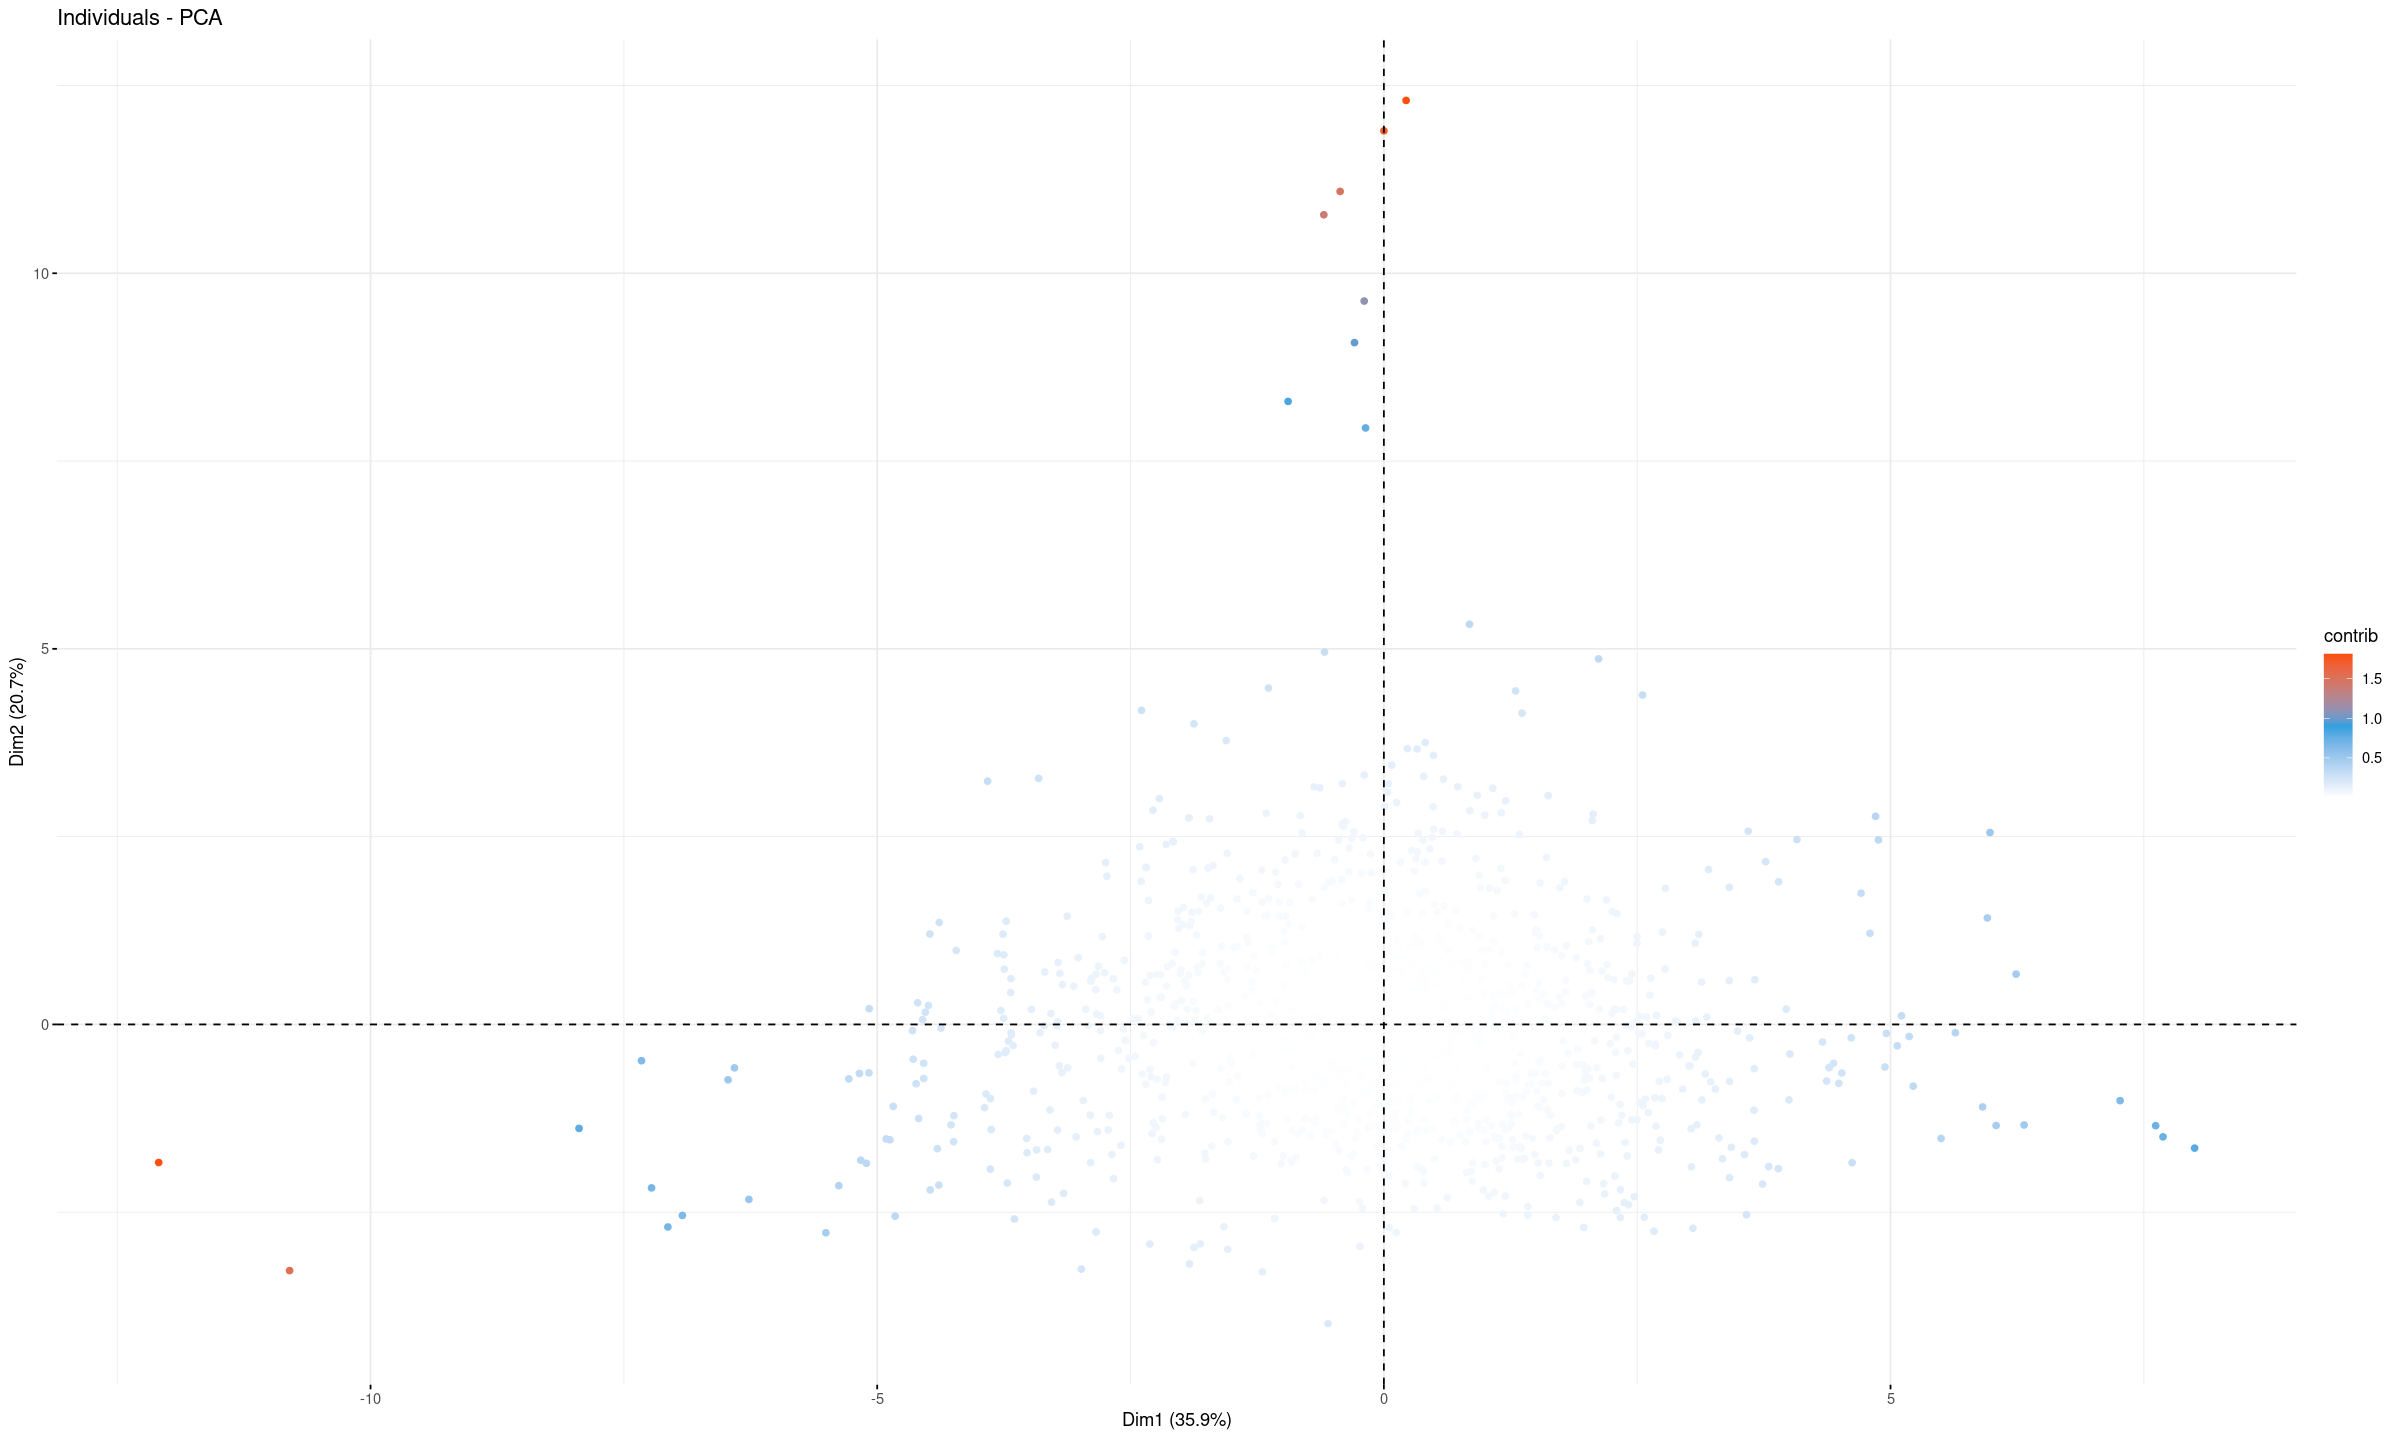

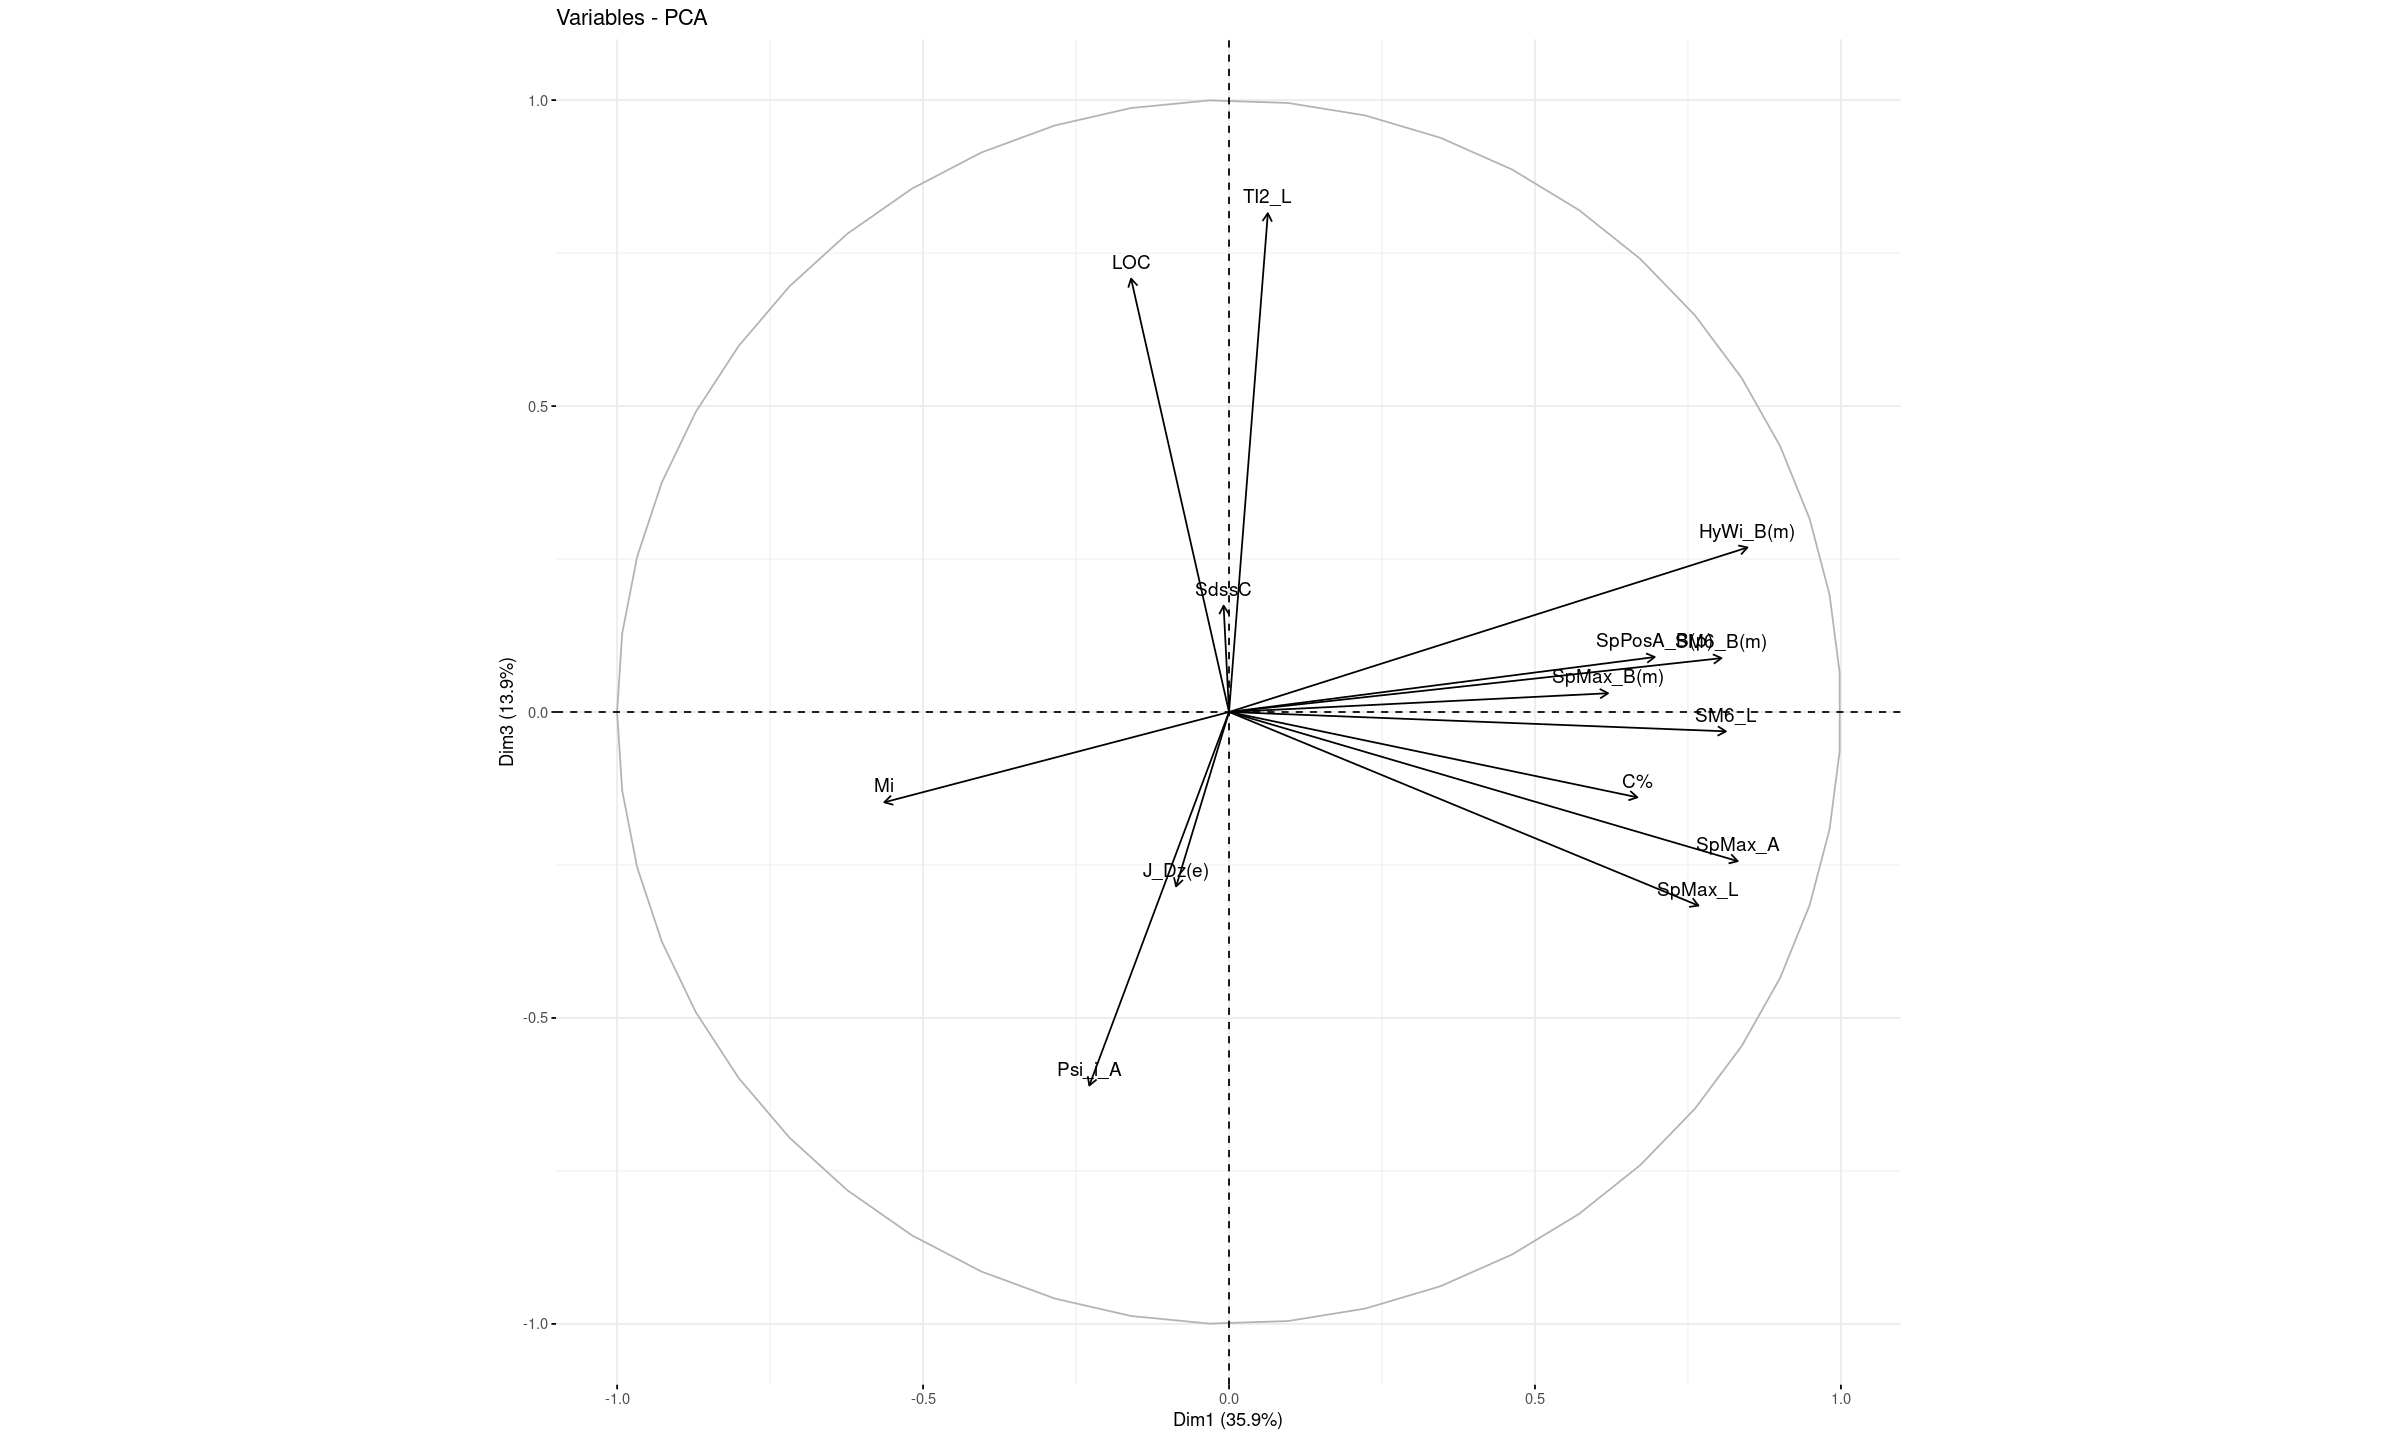

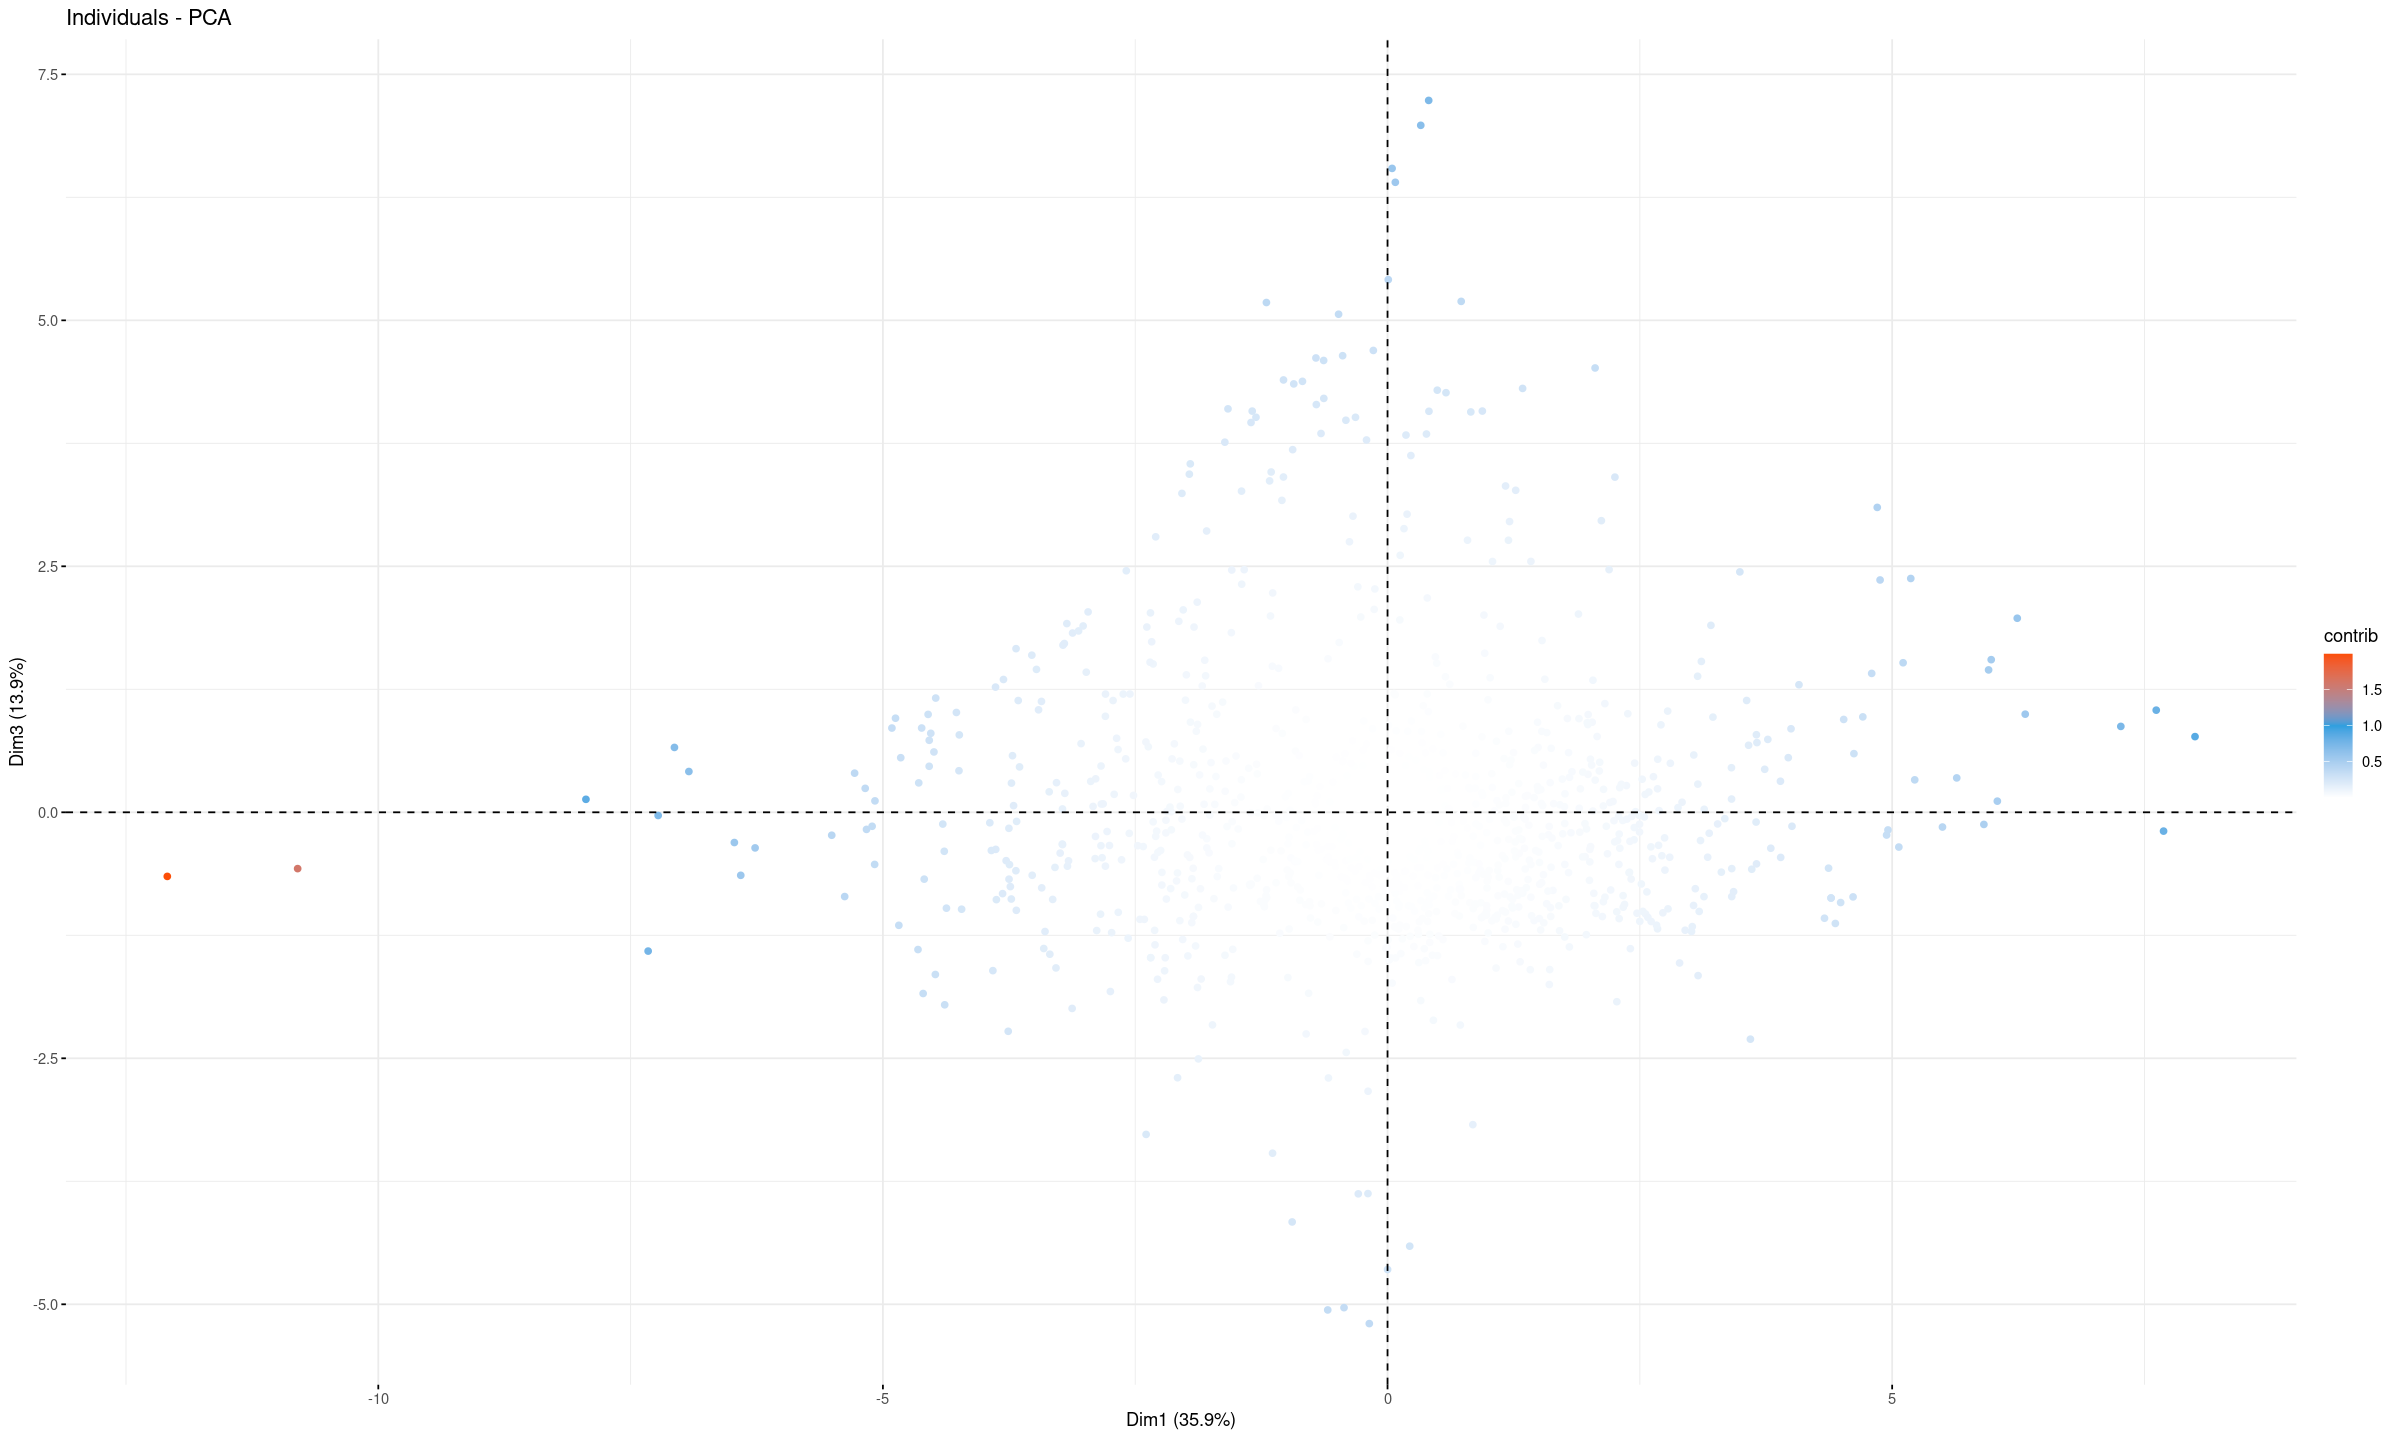

In [217]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

**Comment**:

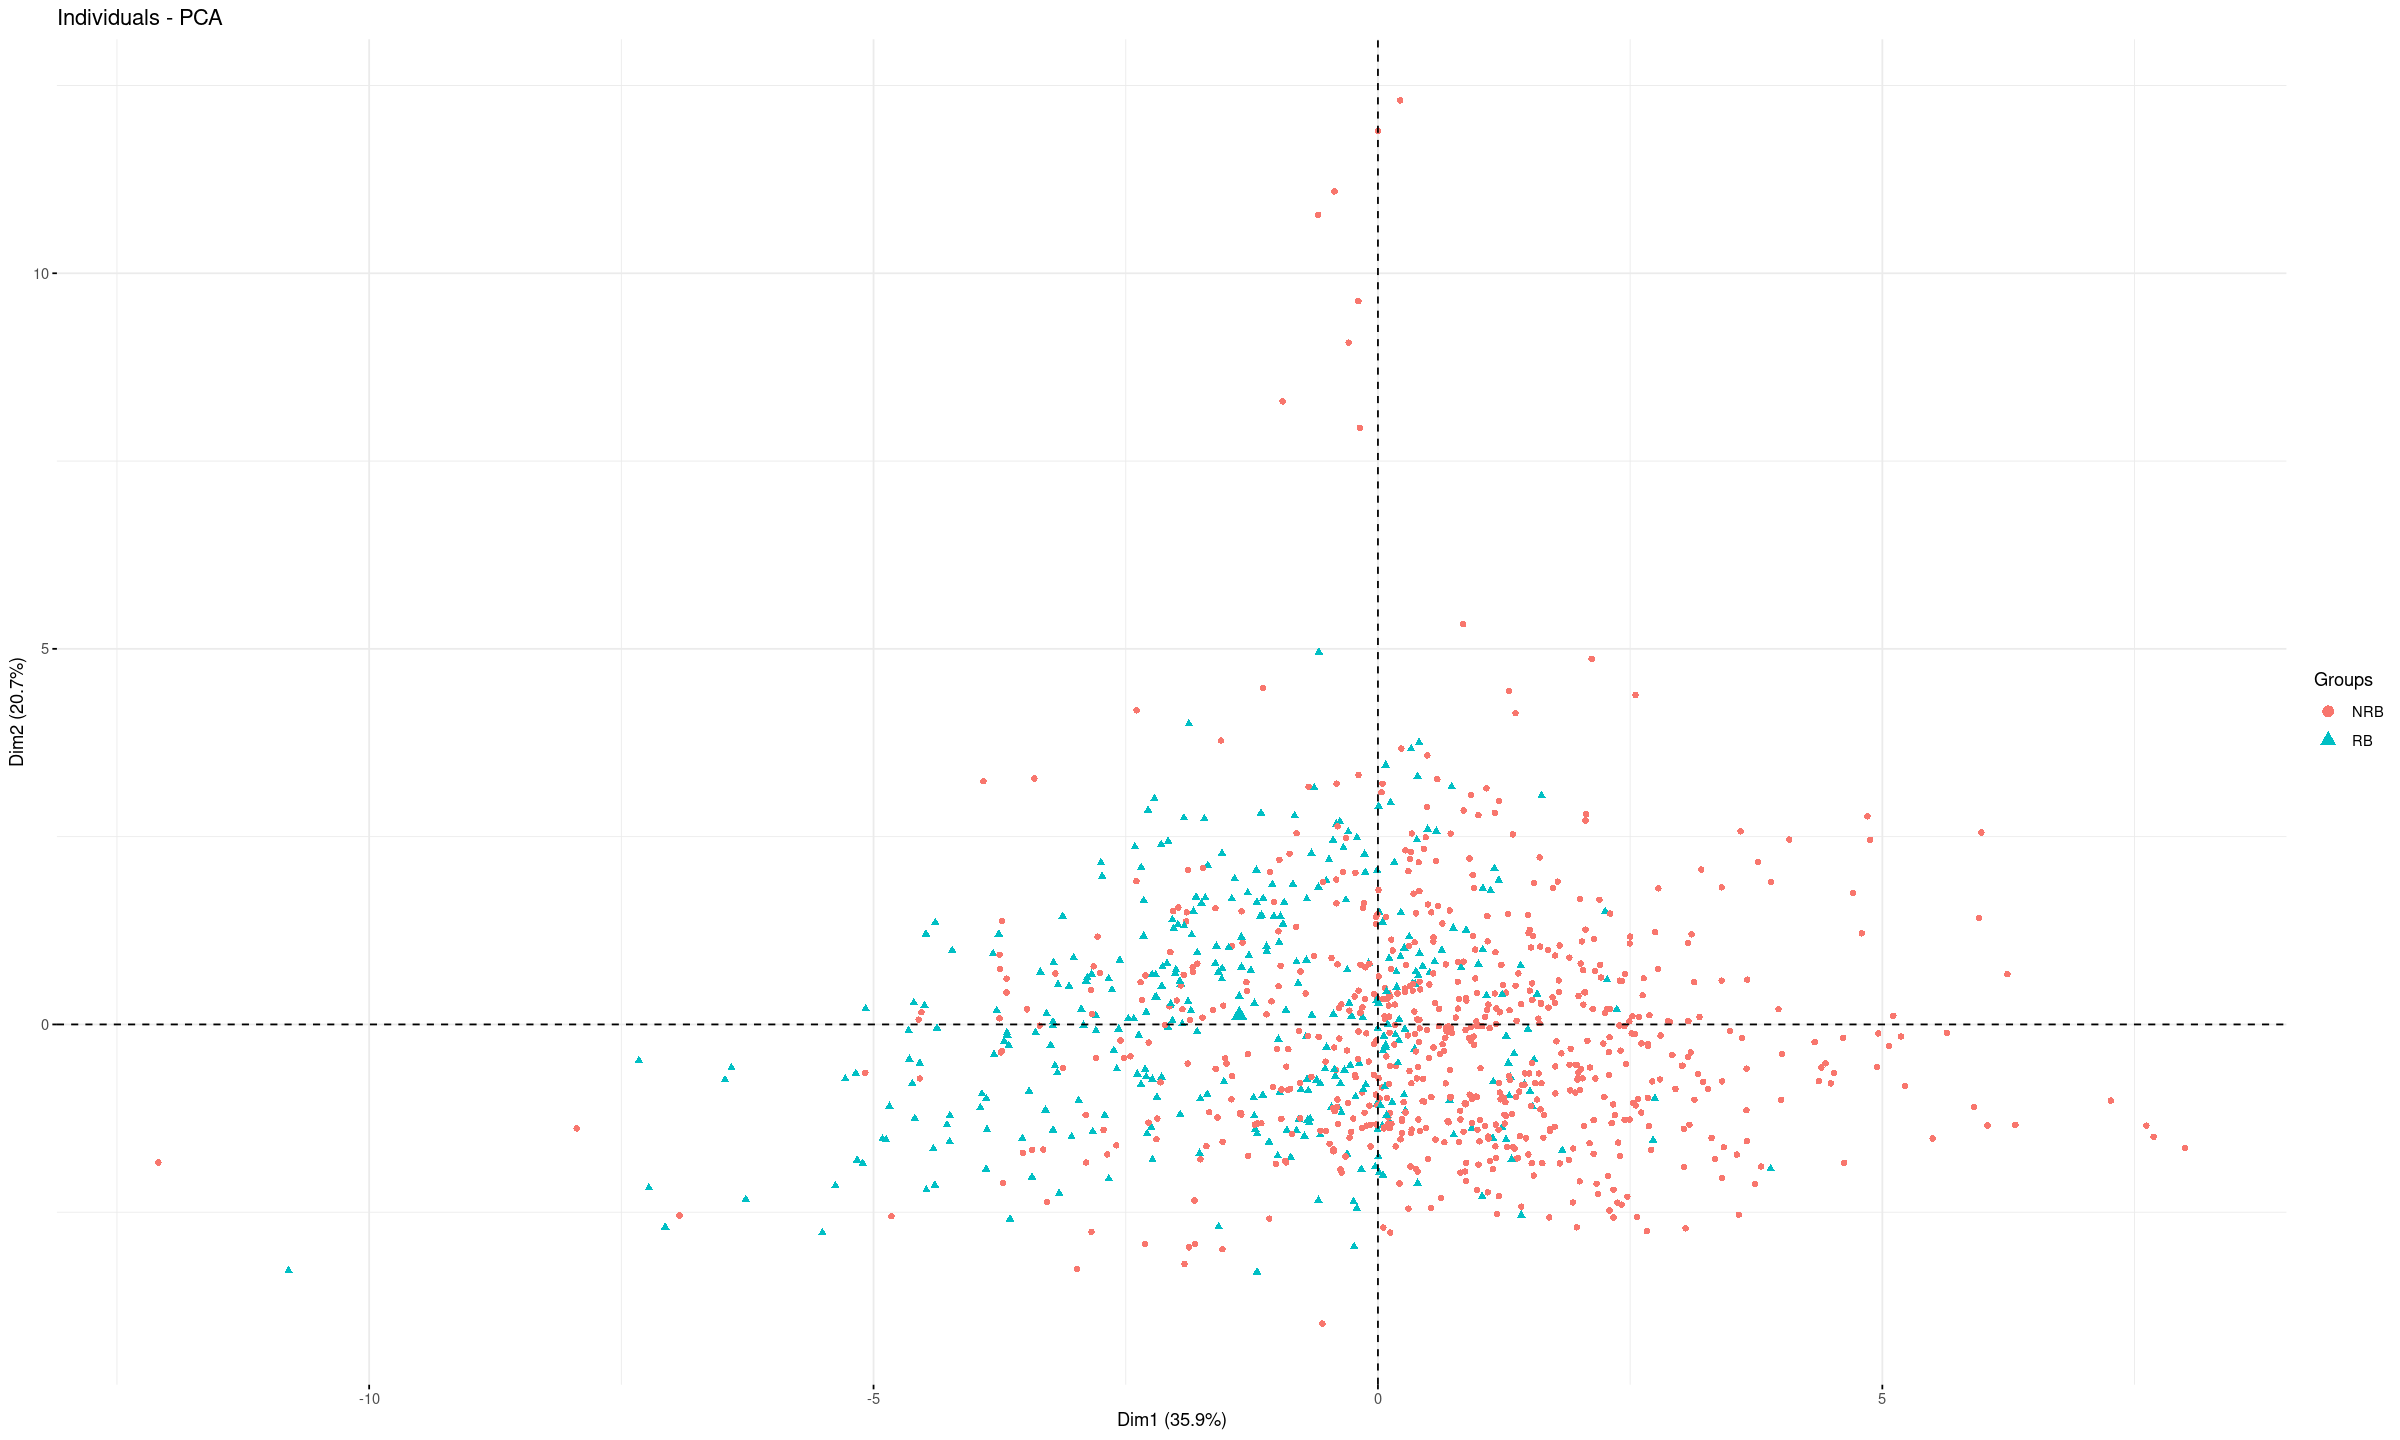

In [223]:
fviz_pca_ind(acp, label="none", habillage=biodeg$Response)

# Training & test set splitting 

## Get dummy variables

In [271]:
set.seed(42) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [272]:
data$Response = biodeg$Response
names(data) <- make.names(names(data))

head(data)

,SpMax_L,J_Dz.e.,C.,SdssC,HyWi_B.m.,LOC,SM6_L,F03.C.O.,Me,Mi,⋯,B01.C.Br.,B03.C.Cl.,SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B.m.,Psi_i_A,SM6_B.m.,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,⋯,0,0,1.932,0.011,0.000,4.489,2.949,1.591,7.253,RB
2,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,⋯,0,0,2.214,-0.204,0.000,1.542,3.315,1.967,7.257,RB
3,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,⋯,0,0,1.942,-0.008,0.000,4.891,3.076,2.417,7.601,RB
4,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,⋯,0,0,1.414,1.073,8.361,1.333,3.046,5.000,6.690,RB
5,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,1,1.004,1.147,⋯,0,0,1.985,-0.002,10.348,5.588,3.351,2.405,8.003,RB
6,4.236,3.4286,28.6,-0.275,3.313,2.522,9.383,1,1.014,1.149,⋯,0,0,1.980,-0.008,10.276,4.746,3.351,2.556,7.904,RB


In [277]:
# construction de l'échantillon d'apprentissage
datapp <- data[appri, ] 
# construction de l'échantillon test
datest <- data[testi, ] 


# 4. Model comparison

## 4.3. Optimal tree 

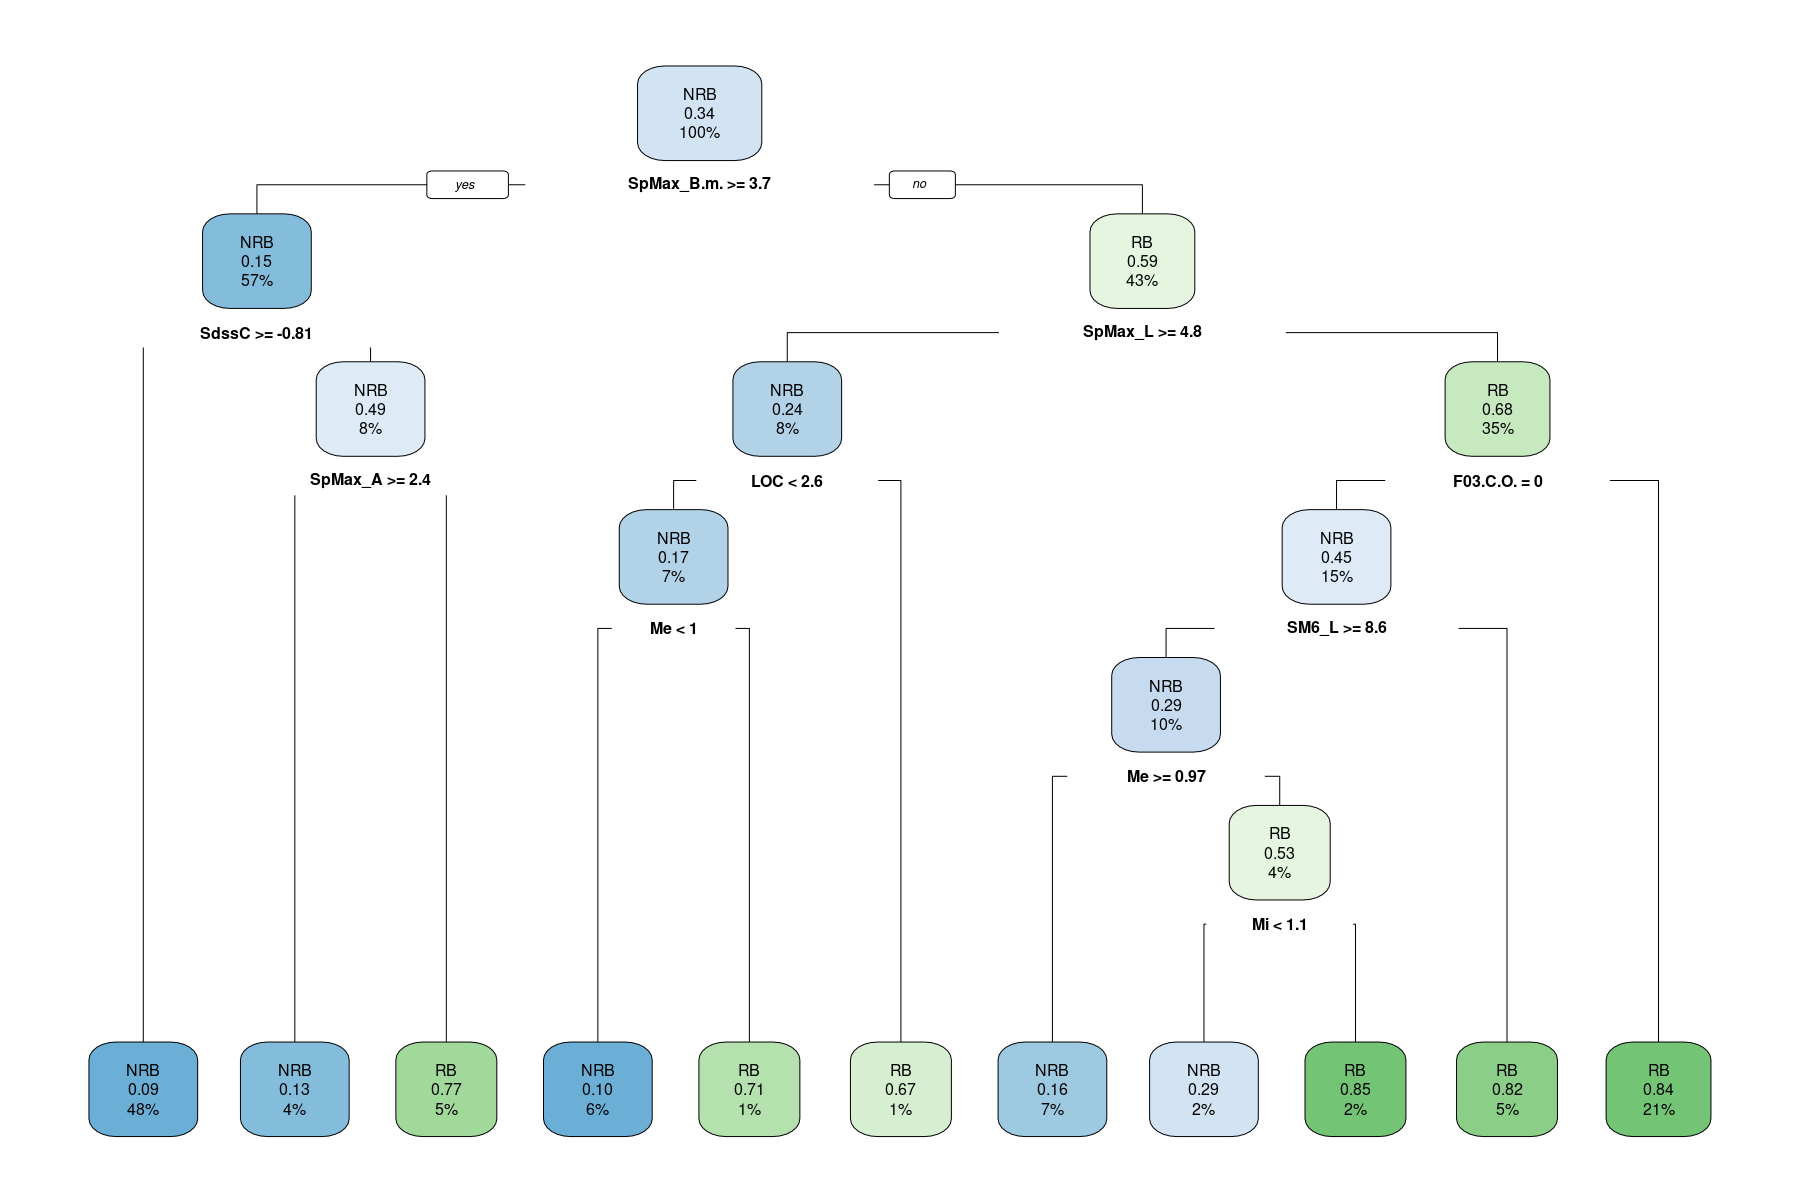

In [278]:
library(rpart) 
library(rpart.plot)

tree.class = rpart(Response~., data = datapp, method = 'class')

rpart.plot(tree.class)

In [279]:
predict_test = predict(tree.class, datest, type = "class")
confusion_matrix = table(datest$Response, predict_test)
confusion_matrix

     predict_test
      NRB  RB
  NRB 128  16
  RB   18  49

## 4.4. Random forest 

In [284]:
library(randomForest)
forest.class <- randomForest(Response ~ ., 
                        data = datapp, 
                        importance = TRUE,
                             proximity = TRUE
                        )
print(forest.class)


Call:
 randomForest(formula = Response ~ ., data = datapp, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 14.81%
Confusion matrix:
    NRB  RB class.error
NRB 501  54   0.0972973
RB   71 218   0.2456747


In [286]:
library(caret)

Le chargement a nécessité le package : lattice


Attachement du package : ‘caret’


L'objet suivant est masqué depuis ‘package:purrr’:

    lift




In [287]:
p2 <- predict(forest.class, datest)
confusionMatrix(p2, datest$Response)


Confusion Matrix and Statistics

          Reference
Prediction NRB  RB
       NRB 132  18
       RB   12  49
                                         
               Accuracy : 0.8578         
                 95% CI : (0.8033, 0.902)
    No Information Rate : 0.6825         
    P-Value [Acc > NIR] : 3.733e-09      
                                         
                  Kappa : 0.6639         
                                         
 Mcnemar's Test P-Value : 0.3613         
                                         
            Sensitivity : 0.9167         
            Specificity : 0.7313         
         Pos Pred Value : 0.8800         
         Neg Pred Value : 0.8033         
             Prevalence : 0.6825         
         Detection Rate : 0.6256         
   Detection Prevalence : 0.7109         
      Balanced Accuracy : 0.8240         
                                         
       'Positive' Class : NRB            
                                         

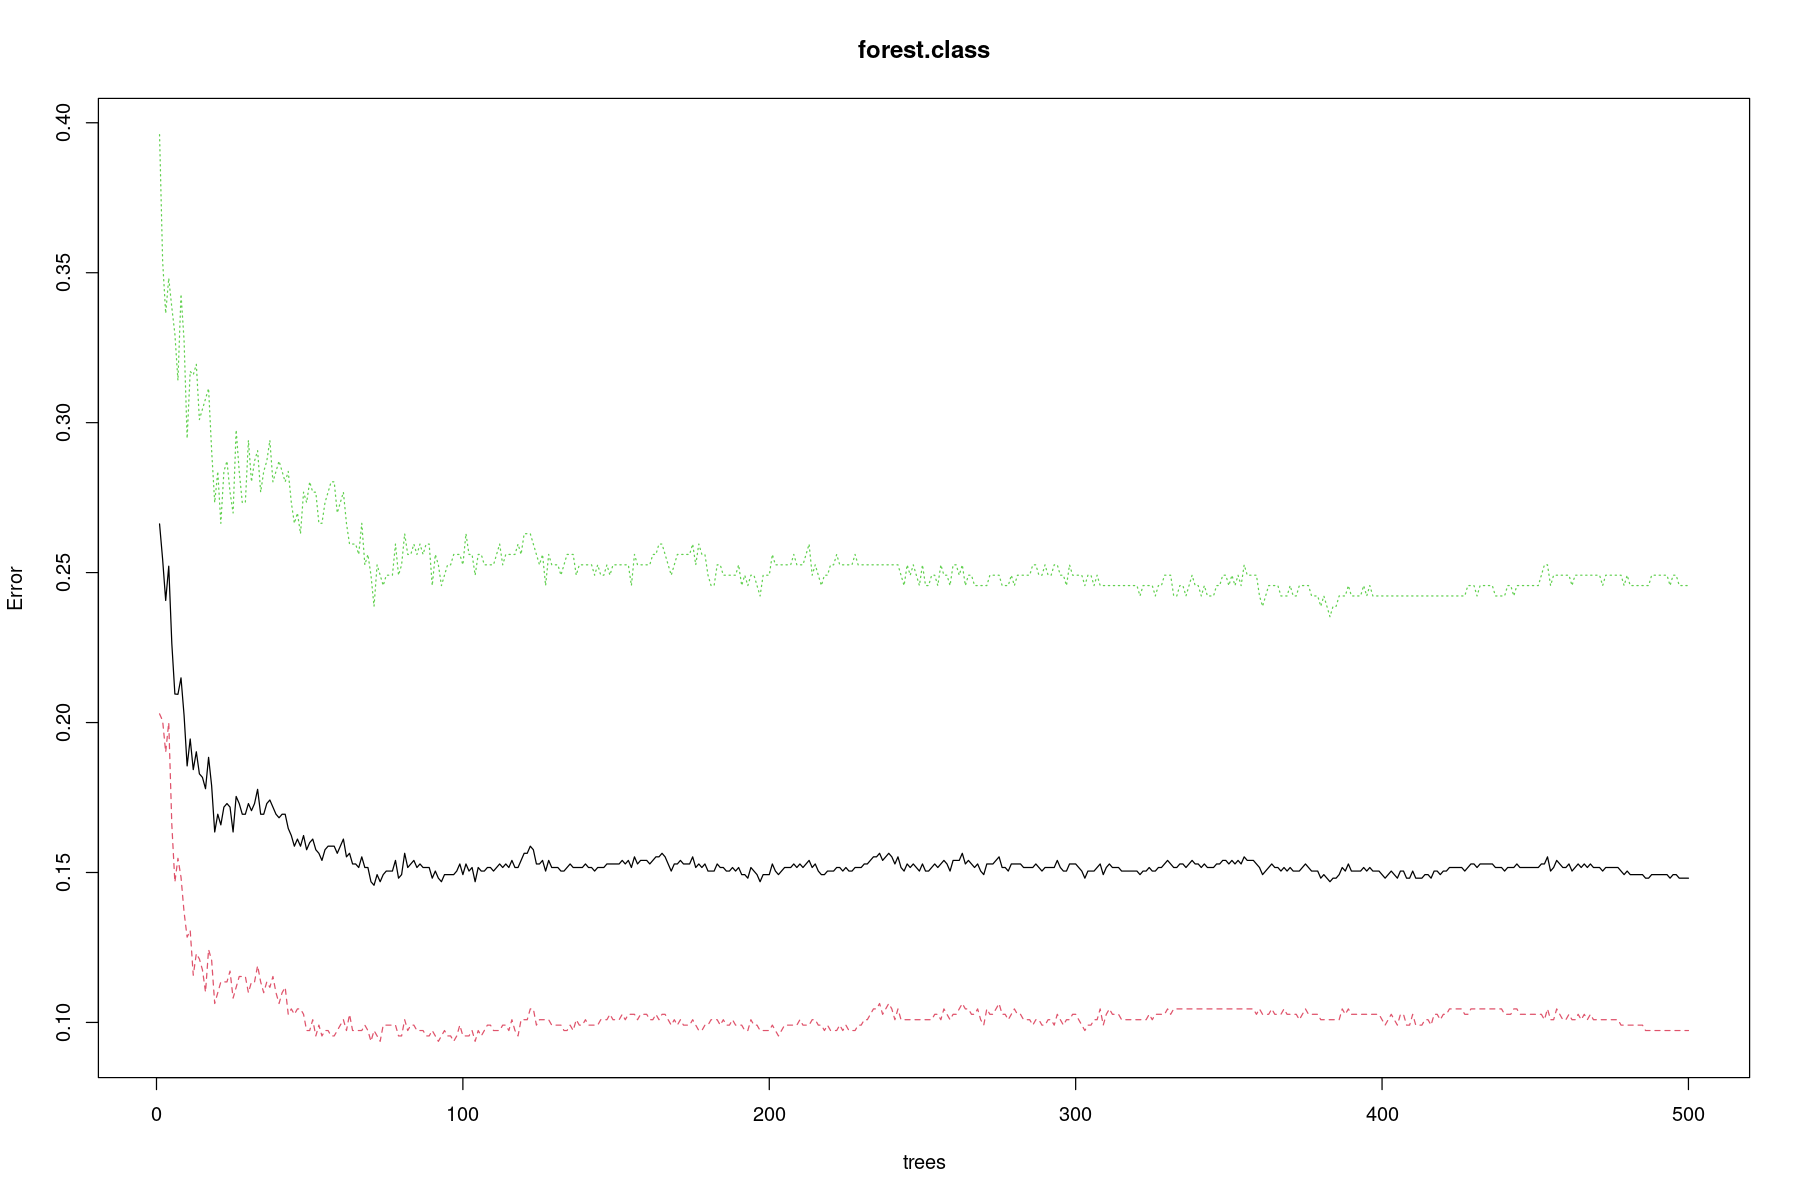

In [288]:
plot(forest.class)

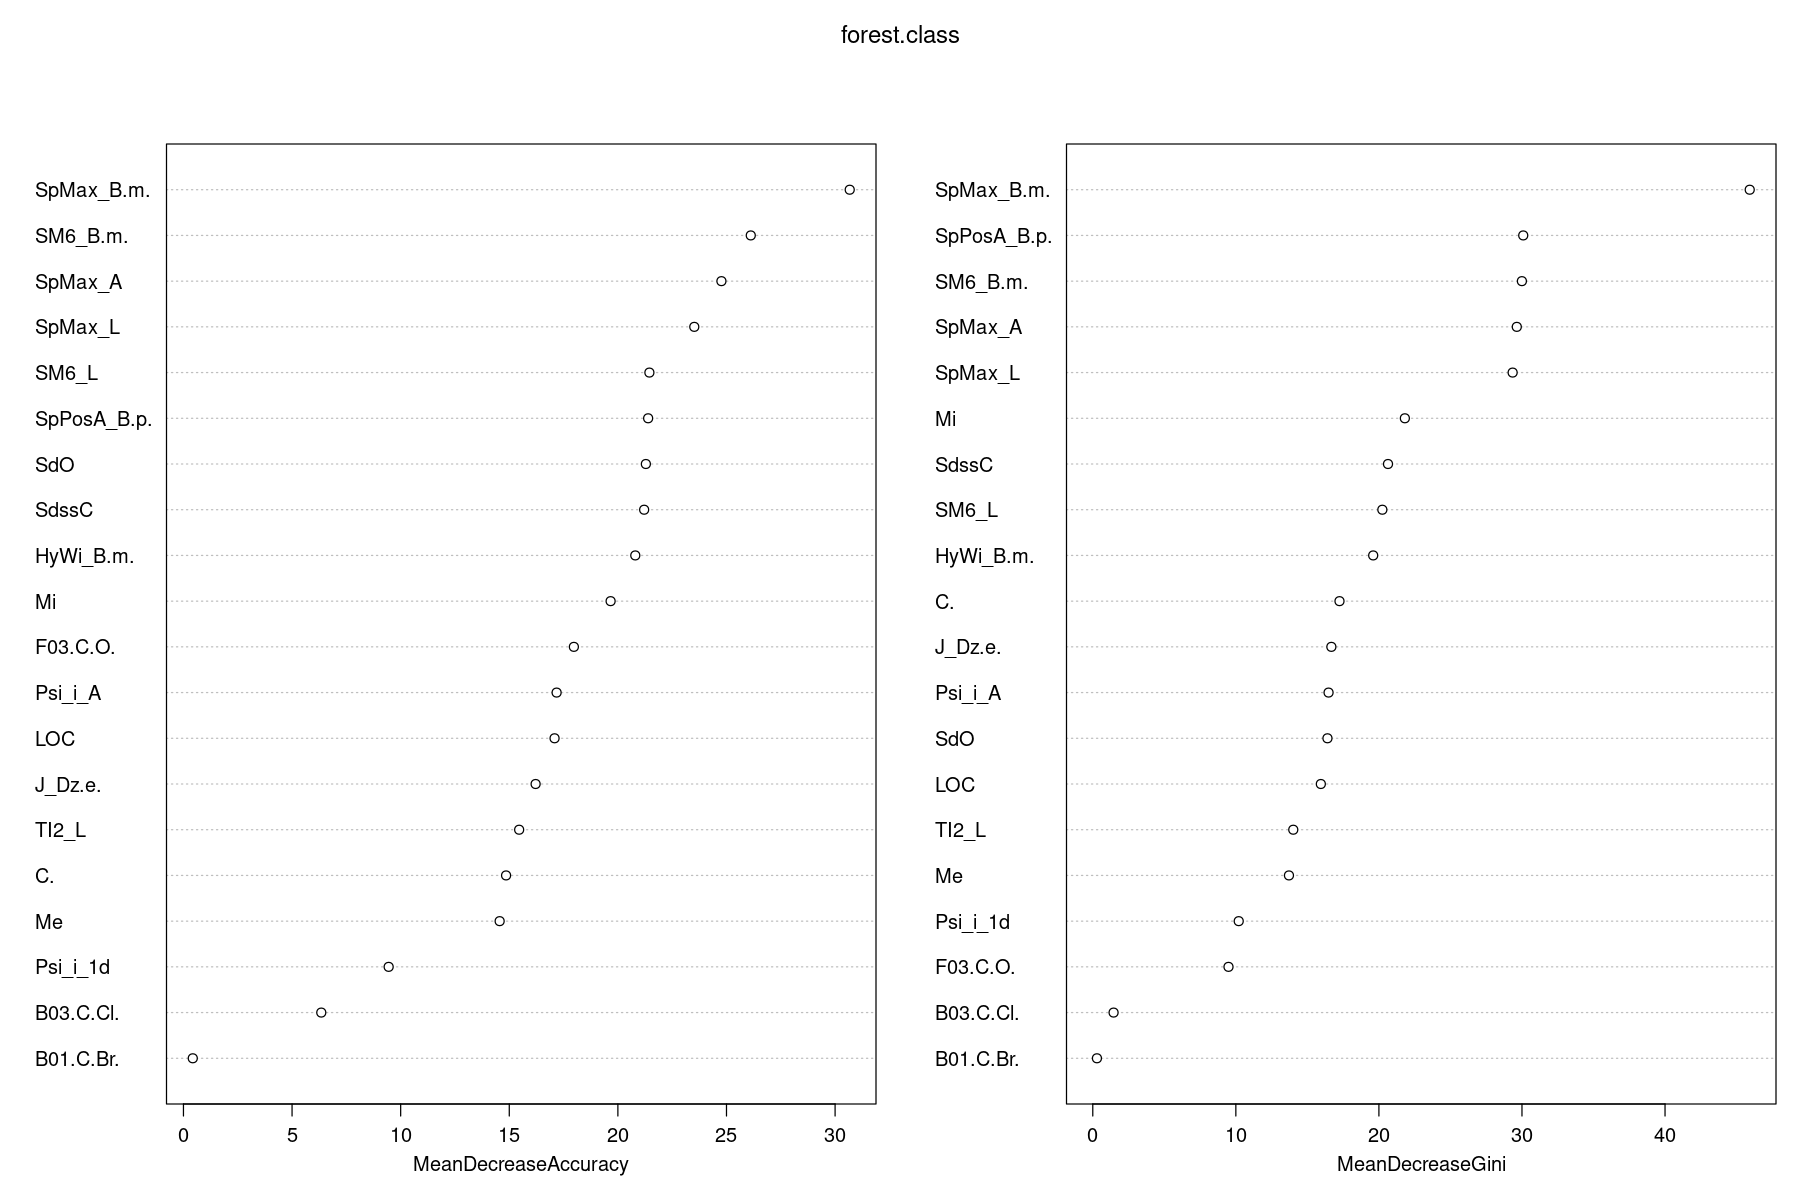

In [291]:
varImpPlot(forest.class)

### Grid Search exhautive

In [411]:
from sklearn.ensemble import RandomForestClassifier 

# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf'
rf_init = RandomForestClassifier(random_state= SEED, 
                                 bootstrap=True, oob_score=True, max_leaf_nodes=None, max_depth=None)

param={"max_features":list(range(2,10,2)) , #+ ['log2', 'sqrt'], 
       "min_samples_split":list(range(2,20,2)), 
       "min_samples_leaf":list(range(1, 11, 2)), 
      'n_estimators': [300, 400, 500], 
      }
rf = GridSearchCV(rf_init, param, cv=10, n_jobs=-1)
rfOpt = rf.fit(Xr_train, Y_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.138697, Meilleur paramètre = {'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


test error =  0.1327014218009479


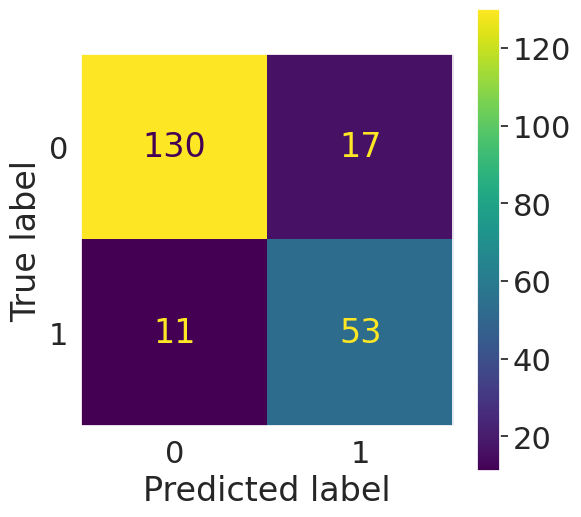

In [414]:
# erreur de prévision sur le test et matrice de confusion
evaluation(rfOpt, Xr_test, Y_test)

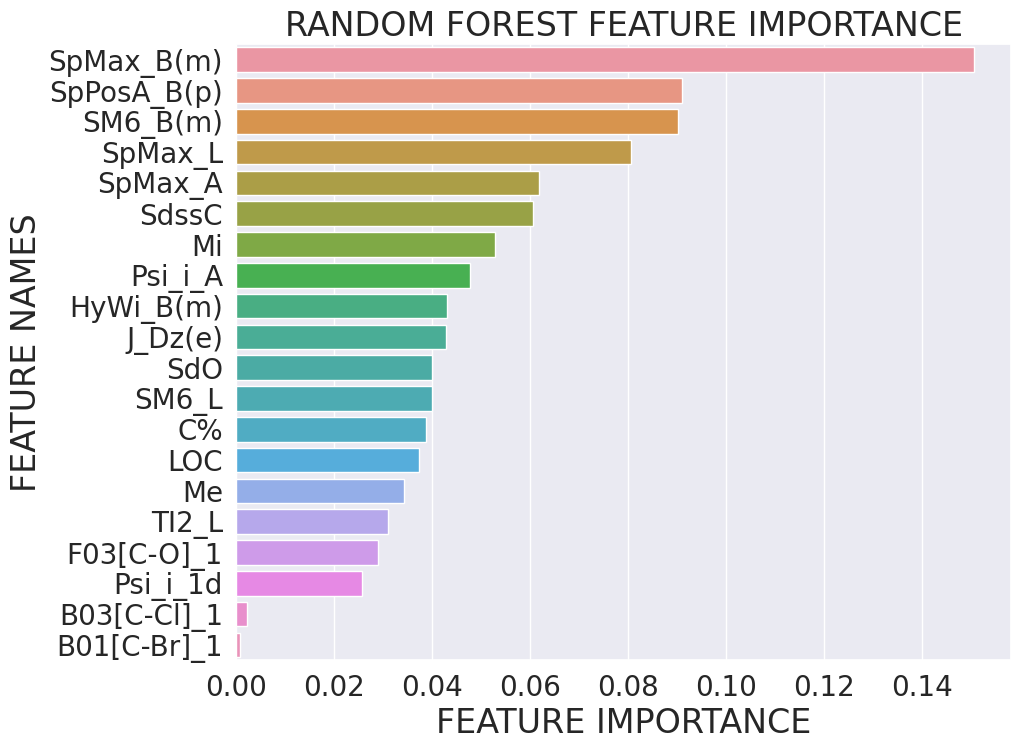

In [415]:
rf= RandomForestClassifier(n_estimators=rfOpt.best_params_['n_estimators']
                           ,max_features=rfOpt.best_params_['max_features'],
                          min_samples_split=rfOpt.best_params_['min_samples_split'],
                          min_samples_leaf=rfOpt.best_params_['min_samples_leaf'],
                          bootstrap=True, oob_score=True, max_leaf_nodes=None 
                          )
rfFit=rf.fit(Xr_train, Y_train)
plot_feature_importance(rfFit.feature_importances_,new_data.columns,'RANDOM FOREST')

## Boosting algorithm

### AdaBoost

Temps boosting = 33.463319, Meilleur taux = 0.151709, Meilleur paramètre = {'n_estimators': 100}


test error =  0.16587677725118488


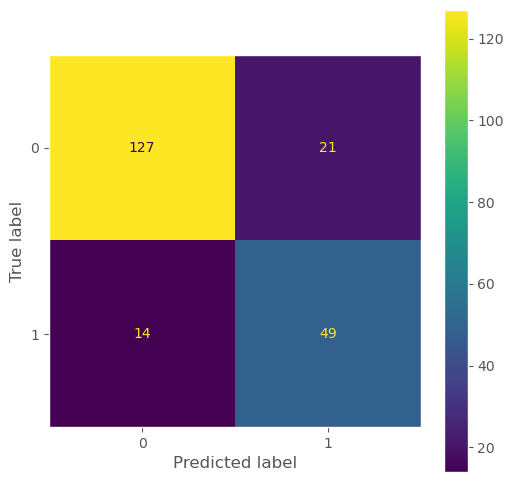

In [246]:
from sklearn.ensemble import AdaBoostClassifier
tps0=time.perf_counter()
param=[{"n_estimators":[100, 300, 500, 1000]}]
ada = GridSearchCV(AdaBoostClassifier(),param,cv=10)
adaOpt = ada.fit(Xr_train, Y_train)

# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - adaOpt.best_score_,adaOpt.best_params_))
print("\n")
# evaluation
evaluation(adaOpt,Xr_test,Y_test)

### Gradient Boosting Models

Temps boosting = 112.167098, Meilleur taux = 0.142227, Meilleur paramètre = {'n_estimators': 1000}


test error =  0.16587677725118488


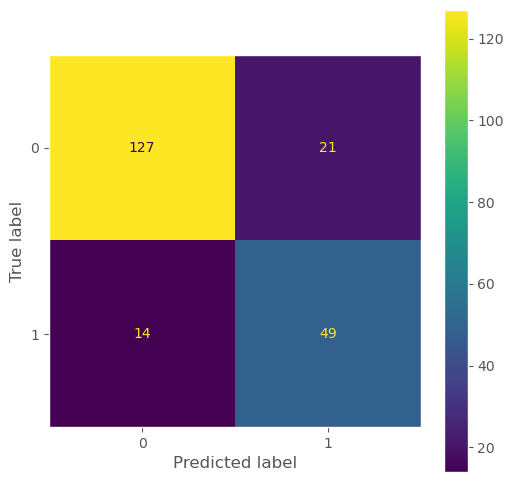

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
tps0=time.perf_counter()
param=[{"n_estimators":[500, 1000, 1500, 2000]}]
gbm = GridSearchCV(GradientBoostingClassifier(),param,cv=10)
gbmOpt = gbm.fit(Xr_train, Y_train)

# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - gbmOpt.best_score_,gbmOpt.best_params_))

print("\n")
# evaluation
evaluation(adaOpt,Xr_test,Y_test)

**Comment**: 